<a href="https://colab.research.google.com/github/Louisfhgr/Dash.py/blob/master/Vorw%C3%A4rtsbewegung_standartisieren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

`physics-computer` ist eine Python-Package, welches verschiedene physikalische Grössen, wie Geschwindigkeit,
Beschleunigungen etc. von Ski- und Langläufern ausgestattet mit einem Bewegungssensor, berechnet.

## Installation

```
pip install physics_computer-0.0.1-py3-none-any.whl
```

Für eine korrekte Installation muss die gewünschte virtuelle Umgebung aktiviert sein, damit das der `PhysicsComputer`
an die richtige Stelle installiert wird.

## Anwendung

```python
import pandas as pd
from physics_computer.ski_alpine import SkiAlpine
from physics_computer.ski_xc import SkiCrossCountry

df = pd.read_csv("/data/raw_data_file.cvs")

alpine = SkiAlpine(df=df)
df_modified = alpine.compute()

# oder

xc = SkiCrossCountry(df=df)
df_modified = xc.compute()
```

Genauere Beschreibungen können der Packet-internen Beschreibung entnommen werden.


## Für Entwickler

Die Klasse `PhysicsComputer` ist die abstrakte Elternklasse. Von ihr werden keine direkten Instanzen erstellt, aber sie
hält alle Methoden, welche die Kind-Klassen `SkiAlpine` und `SkiCrossCountry` gemeinsam halten. Sind die Methoden spezifisch
für Alpine oder Langlauf, werden sie in der entsprechenden Kind-Klasse implementiert. Die Methode `compute()` führt
dann alle Berechnungen seriell für die entsprechende Instanz durch.

Der `PhysicsComputer` (resp. seine Kind-Klassen) erhalten jeweils einen pandas DataFrame als Input. Dieser ist immer ein einziger
Run eines einzelnen Athleten oder Athletin

Um ein neues Package zu erstellen, in `setup.py` die Versionsnummer hochzählen und im Terminal
```
python setup.py bdist_wheel
```
ausführen.

-------------------------------------------------------------------------

## Daten hochladen

In [27]:
print(os.listdir())

['.config', '.ipynb_checkpoints', 'physics-computer-master', 'physics-computer-master.zip', 'export_data_transformed.csv', 'sample_data']


In [291]:
from google.colab import files
import zipfile
import os
import pandas as pd
from physics_computer.ski_xc import SkiCrossCountry

def import_data_and_merge(
    run_csv_name="Goms_2024-01-27_nadine_faehndrich_run_1.csv",
    export_csv_name="export_data_transformed.csv",
    name_filter="FAEHNDRICH Nadine Run__1",
    zip_name="physics-computer-master.zip",
    extract_folder="physics-computer-master"
):




    extract_path = f"/content/{extract_folder}"
    csv_main_path = f"{extract_folder}/data/xc/{run_csv_name}"

    # ZIP hochladen, wenn nötig
    if zip_name not in os.listdir():
        print("Bitte ZIP-Datei (Physics-computer-master) hochladen...")
        files.upload()

    # Entpacken, falls noch nicht geschehen
    if not os.path.exists(extract_path):
        print("Entpacke ZIP-Datei...")
        with zipfile.ZipFile(zip_name, 'r') as zip_ref:
            zip_ref.extractall("/content")

    # Installiere wheel, falls vorhanden
    wheel_path = os.path.join(extract_path, "dist/physics_computer-0.0.2-py3-none-any.whl")
    if os.path.exists(wheel_path):
        os.system(f"pip install {wheel_path}")

    # Lade Hauptdaten
    main_csv_full_path = os.path.join("/content", csv_main_path)
    df_modified = pd.read_csv(main_csv_full_path)




    xc = SkiCrossCountry(df=df_modified)
    df_modified = xc.compute()

    # Lade exportierte Transformationsdaten
    if export_csv_name not in os.listdir():
        print("Bitte auch export_data_transformed.csv (switchdrive) hochladen...")
        files.upload()

    df_gears = pd.read_csv(f"/content/{export_csv_name}")

    # Filtere relevante Zeile(n)
    df_filtered = df_gears[df_gears["name_run"] == name_filter]

    if df_filtered.empty:
        raise ValueError(f"Kein Eintrag mit name_run = '{name_filter}' gefunden.")

    # Mappe "technic" auf df_modified basierend auf Zeit
    df_modified["technic"] = df_modified["time"].map(
        df_filtered.set_index("time")["technic"]
    )

    print("Techniken im DataFrame:", df_modified["technic"].unique())
    return df_modified


In [292]:
df = import_data_and_merge("Goms_2024-01-27_nadine_faehndrich_run_1.csv")
df

2025-03-25 14:54:39.297 | INFO     | physics_computer.ski_xc:_compute_xc_specific_physical_size:20 - xc specific


Techniken im DataFrame: [nan  3.  2.  6.  5.  4.]


<ipython-input-291-01984c0b3a40>:52: DtypeWarning:

Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.



,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,shifted_y_norm,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v,technic
0,46.500480,8.302427,1351.381,10.3,20240127T120231400000,XC,11783,12:02:31.4,2024-01-27,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,2024-01-27 12:02:31.400,2024-01-27 12:02:31.400,0.0,0.000000,NaN
1,46.500479,8.302423,1351.472,13.3,20240127T120231500000,XC,11783,12:02:31.5,2024-01-27,-0.369094,...,0.000000,46.500480,8.302427,0.379037,0.378899,2024-01-27 12:02:31.500,2024-01-27 12:02:31.400,0.1,3.788987,NaN
2,46.500477,8.302418,1351.411,13.7,20240127T120231600000,XC,11783,12:02:31.6,2024-01-27,-0.708476,...,-0.085640,46.500479,8.302423,0.392572,0.392429,2024-01-27 12:02:31.600,2024-01-27 12:02:31.500,0.1,3.924287,NaN
3,46.500475,8.302414,1351.401,13.7,20240127T120231700000,XC,11783,12:02:31.7,2024-01-27,-1.017755,...,-0.282667,46.500477,8.302418,0.406760,0.406611,2024-01-27 12:02:31.700,2024-01-27 12:02:31.600,0.1,4.066112,NaN
4,46.500472,8.302410,1351.482,14.6,20240127T120231800000,XC,11783,12:02:31.8,2024-01-27,-1.335394,...,-0.546636,46.500475,8.302414,0.466690,0.466520,2024-01-27 12:02:31.800,2024-01-27 12:02:31.700,0.1,4.665201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,46.500567,8.302191,1353.517,27.0,20240127T120537800000,XC,11783,12:05:37.8,2024-01-27,-18.030371,...,10.570932,46.500574,8.302209,1.513311,1.512759,2024-01-27 12:05:37.800,2024-01-27 12:05:37.600,0.2,7.563793,NaN
1865,46.500564,8.302183,1353.531,27.0,20240127T120537900000,XC,11783,12:05:37.9,2024-01-27,-18.700775,...,9.871584,46.500567,8.302191,0.741562,0.741292,2024-01-27 12:05:37.900,2024-01-27 12:05:37.800,0.1,7.412916,NaN
1866,46.500561,8.302174,1353.541,26.7,20240127T120538000000,XC,11783,12:05:38.0,2024-01-27,-19.363507,...,9.555245,46.500564,8.302183,0.734657,0.734389,2024-01-27 12:05:38.000,2024-01-27 12:05:37.900,0.1,7.343888,NaN
1867,46.500559,8.302166,1353.513,25.9,20240127T120538100000,XC,11783,12:05:38.1,2024-01-27,-20.002827,...,9.238838,46.500561,8.302174,0.695094,0.694840,2024-01-27 12:05:38.100,2024-01-27 12:05:38.000,0.1,6.948404,NaN


# Pyhsics-computer abrufen

In [294]:
fig = xc.plot(feature=["a_x_norm_sp", "a_y_norm_sp", "a_elevation_sp"], title="Gefilterte Beschleunigung (Savitzky-Golay-Filter)")
fig.show()

In [295]:
df

,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,shifted_y_norm,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v,technic
0,46.500480,8.302427,1351.381,10.3,20240127T120231400000,XC,11783,12:02:31.4,2024-01-27,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,2024-01-27 12:02:31.400,2024-01-27 12:02:31.400,0.0,0.000000,NaN
1,46.500479,8.302423,1351.472,13.3,20240127T120231500000,XC,11783,12:02:31.5,2024-01-27,-0.369094,...,0.000000,46.500480,8.302427,0.379037,0.378899,2024-01-27 12:02:31.500,2024-01-27 12:02:31.400,0.1,3.788987,NaN
2,46.500477,8.302418,1351.411,13.7,20240127T120231600000,XC,11783,12:02:31.6,2024-01-27,-0.708476,...,-0.085640,46.500479,8.302423,0.392572,0.392429,2024-01-27 12:02:31.600,2024-01-27 12:02:31.500,0.1,3.924287,NaN
3,46.500475,8.302414,1351.401,13.7,20240127T120231700000,XC,11783,12:02:31.7,2024-01-27,-1.017755,...,-0.282667,46.500477,8.302418,0.406760,0.406611,2024-01-27 12:02:31.700,2024-01-27 12:02:31.600,0.1,4.066112,NaN
4,46.500472,8.302410,1351.482,14.6,20240127T120231800000,XC,11783,12:02:31.8,2024-01-27,-1.335394,...,-0.546636,46.500475,8.302414,0.466690,0.466520,2024-01-27 12:02:31.800,2024-01-27 12:02:31.700,0.1,4.665201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,46.500567,8.302191,1353.517,27.0,20240127T120537800000,XC,11783,12:05:37.8,2024-01-27,-18.030371,...,10.570932,46.500574,8.302209,1.513311,1.512759,2024-01-27 12:05:37.800,2024-01-27 12:05:37.600,0.2,7.563793,NaN
1865,46.500564,8.302183,1353.531,27.0,20240127T120537900000,XC,11783,12:05:37.9,2024-01-27,-18.700775,...,9.871584,46.500567,8.302191,0.741562,0.741292,2024-01-27 12:05:37.900,2024-01-27 12:05:37.800,0.1,7.412916,NaN
1866,46.500561,8.302174,1353.541,26.7,20240127T120538000000,XC,11783,12:05:38.0,2024-01-27,-19.363507,...,9.555245,46.500564,8.302183,0.734657,0.734389,2024-01-27 12:05:38.000,2024-01-27 12:05:37.900,0.1,7.343888,NaN
1867,46.500559,8.302166,1353.513,25.9,20240127T120538100000,XC,11783,12:05:38.1,2024-01-27,-20.002827,...,9.238838,46.500561,8.302174,0.695094,0.694840,2024-01-27 12:05:38.100,2024-01-27 12:05:38.000,0.1,6.948404,NaN


In [200]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401


def Savitzky_golay(
    df: pd.DataFrame,
    filter_for: tuple = ("x_norm", "y_norm", "elevation"),
    window_size: int = 11,
    order: int = 3,
    plot: bool = True,
    plot_2d: bool = True,
    plot_3d: bool = True
) -> pd.DataFrame:
    """
    Wendet Savitzky-Golay-Filter auf ausgewählte Spalten an und plottet Zeitreihen + optional 2D/3D-Projektion.

    Args:
        df (pd.DataFrame): DataFrame mit den Daten.
        filter_for (tuple): Spalten, die geglättet und geplottet werden sollen.
        window_size (int): Fenstergröße für den Filter.
        order (int): Ordnung des Filters.
        plot (bool): Zeitreihen-Plot.
        plot_2d (bool): 2D-Projektions-Plot.
        plot_3d (bool): 3D-Projektions-Plot.

    Returns:
        pd.DataFrame: Modifiziertes DataFrame mit neuen *_sp-Spalten.
    """

    # === Glättung ===
    for col in filter_for:
        if col not in df.columns:
            print(f"⚠️ Spalte '{col}' nicht gefunden – übersprungen.")
            continue
        val = df[col].values
        try:
            df[f"{col}_sp"] = savgol_filter(val, window_size, order)
            df[f"v_{col}_sp"] = savgol_filter(val, window_size, order, deriv=1)
            df[f"a_{col}_sp"] = savgol_filter(val, window_size, order, deriv=2)
        except Exception as e:
            print(f"❌ Fehler bei '{col}': {e}")

    # === Zeitreihenplot ===
    if plot:
        plt.figure(figsize=(12, 6))
        try:
            time_series = pd.to_datetime(df["time"], format="%H:%M:%S.%f")
        except:
            try:
                time_series = pd.to_datetime(df["time"])
            except:
                time_series = df.index

        colors = ["red", "blue", "green", "orange", "purple"]
        for i, col in enumerate(filter_for):
            a_col = f"a_{col}_sp"
            if a_col in df.columns:
                plt.plot(time_series, df[a_col], label=f"a_{col}_sp", color=colors[i % len(colors)], alpha=0.8)

        if "technic" in df.columns:
            unique_technic = df["technic"].dropna().unique()
            technic_mapping = {label: idx for idx, label in enumerate(unique_technic)}
            technic_values = df["technic"].map(technic_mapping)
            bg_colors = plt.cm.Pastel1(np.linspace(0, 1, len(technic_mapping)))

            for idx, (label, color) in enumerate(zip(technic_mapping.keys(), bg_colors)):
                mask = technic_values == idx
                plt.fill_between(time_series, -0.03, 0.03, where=mask, color=color, alpha=0.3, label=f"Technic: {label}")

        plt.xlabel("Zeit")
        plt.ylabel("Beschleunigung (m/s²)")
        plt.title("Savitzky-Golay-geglättete Beschleunigungen")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # === 2D-Projektion ===
    if plot_2d and all(f"a_{col}_sp" in df.columns for col in ("x_norm", "y_norm")):
        x = df["a_x_norm_sp"]
        y = df["a_y_norm_sp"]
        technic = df["technic"] if "technic" in df.columns else None

        plt.figure(figsize=(6, 6))
        if technic is not None:
            unique_technic = technic.dropna().unique()
            colors = plt.cm.Set1(np.linspace(0, 1, len(unique_technic)))
            technic_mapping = {label: colors[i] for i, label in enumerate(unique_technic)}

            for i in range(len(x) - 1):
                color = technic_mapping.get(technic.iloc[i], "black")
                plt.plot(x[i:i+2], y[i:i+2], color=color, alpha=0.8)

            legend_patches = [
                plt.Line2D([0], [0], color=color, lw=3, label=f"Technic: {gear}")
                for gear, color in technic_mapping.items()
            ]
            plt.legend(handles=legend_patches, loc="upper right")
        else:
            plt.plot(x, y, color="blue", alpha=0.8)

        plt.scatter(0, 0, color="red", marker="o", label="Nullpunkt")
        plt.xlabel("a_x (m/s²)")
        plt.ylabel("a_y (m/s²)")
        plt.title("2D-Projektion der gefilterten Beschleunigung")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # === 3D-Projektion ===
    if plot_3d and all(f"a_{col}_sp" in df.columns for col in ("x_norm", "y_norm", "elevation")):
        x = df["a_x_norm_sp"]
        y = df["a_y_norm_sp"]
        z = df["a_elevation_sp"]
        technic = df["technic"] if "technic" in df.columns else None

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection="3d")

        if technic is not None:
            unique_technic = technic.dropna().unique()
            colors = plt.cm.viridis(np.linspace(0, 1, len(unique_technic)))
            technic_mapping = {label: colors[i] for i, label in enumerate(unique_technic)}

            for i in range(len(x) - 1):
                color = technic_mapping.get(technic.iloc[i], "black")
                ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=color, alpha=0.8)

            for gear, color in technic_mapping.items():
                ax.scatter([], [], [], color=color, label=f"Technic: {gear}")

        else:
            ax.plot(x, y, z, color="blue", alpha=0.8)

        ax.scatter(0, 0, 0, color="red", marker="o", label="Nullpunkt")
        ax.set_xlabel("a_x (m/s²)")
        ax.set_ylabel("a_y (m/s²)")
        ax.set_zlabel("a_z (m/s²)")
        ax.set_title("3D-Projektion der Inner-Body-Bewegung")
        ax.legend()
        plt.tight_layout()
        plt.show()

    return df


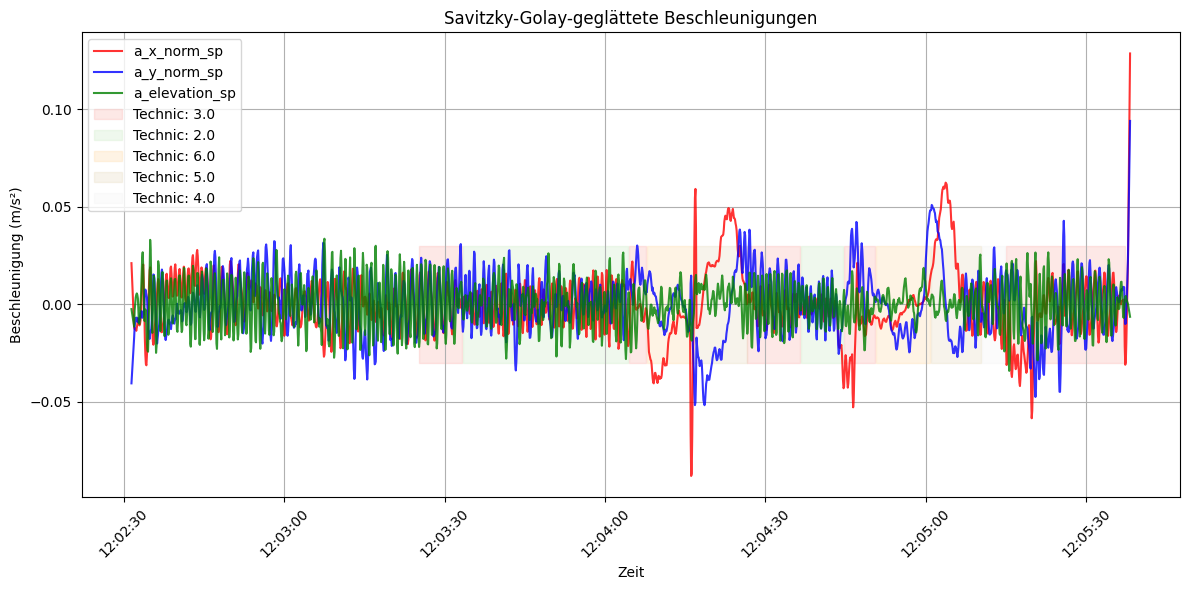

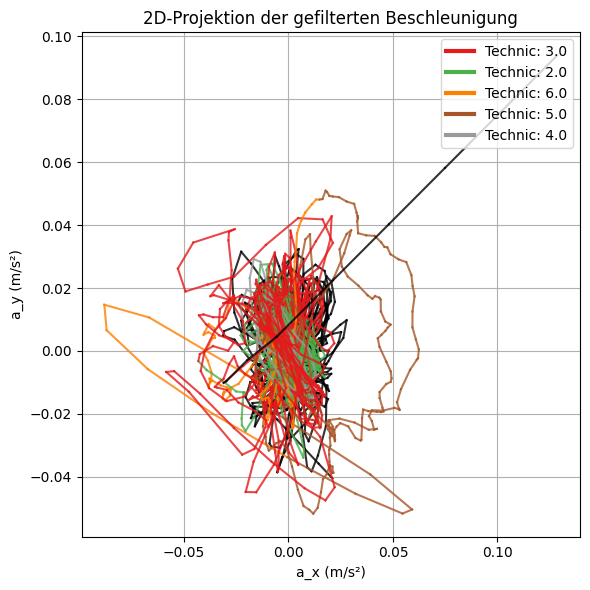

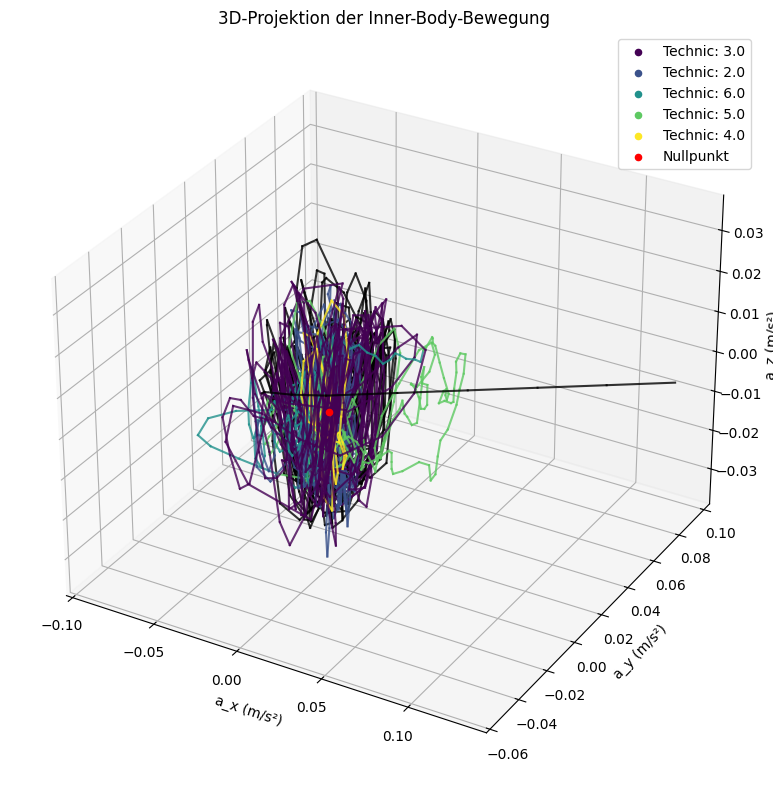

In [296]:
df = Savitzky_golay(df,filter_for=("x_norm","y_norm", "elevation"),window_size=11,order=3)


In [178]:
df

,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,shifted_y_norm,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v,technic
0,46.500480,8.302427,1351.381,10.3,20240127T120231400000,XC,11783,12:02:31.4,2024-01-27,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,2024-01-27 12:02:31.400,2024-01-27 12:02:31.400,0.0,0.000000,NaN
1,46.500479,8.302423,1351.472,13.3,20240127T120231500000,XC,11783,12:02:31.5,2024-01-27,-0.369094,...,0.000000,46.500480,8.302427,0.379037,0.378899,2024-01-27 12:02:31.500,2024-01-27 12:02:31.400,0.1,3.788987,NaN
2,46.500477,8.302418,1351.411,13.7,20240127T120231600000,XC,11783,12:02:31.6,2024-01-27,-0.708476,...,-0.085640,46.500479,8.302423,0.392572,0.392429,2024-01-27 12:02:31.600,2024-01-27 12:02:31.500,0.1,3.924287,NaN
3,46.500475,8.302414,1351.401,13.7,20240127T120231700000,XC,11783,12:02:31.7,2024-01-27,-1.017755,...,-0.282667,46.500477,8.302418,0.406760,0.406611,2024-01-27 12:02:31.700,2024-01-27 12:02:31.600,0.1,4.066112,NaN
4,46.500472,8.302410,1351.482,14.6,20240127T120231800000,XC,11783,12:02:31.8,2024-01-27,-1.335394,...,-0.546636,46.500475,8.302414,0.466690,0.466520,2024-01-27 12:02:31.800,2024-01-27 12:02:31.700,0.1,4.665201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,46.500567,8.302191,1353.517,27.0,20240127T120537800000,XC,11783,12:05:37.8,2024-01-27,-18.030371,...,10.570932,46.500574,8.302209,1.513311,1.512759,2024-01-27 12:05:37.800,2024-01-27 12:05:37.600,0.2,7.563793,NaN
1865,46.500564,8.302183,1353.531,27.0,20240127T120537900000,XC,11783,12:05:37.9,2024-01-27,-18.700775,...,9.871584,46.500567,8.302191,0.741562,0.741292,2024-01-27 12:05:37.900,2024-01-27 12:05:37.800,0.1,7.412916,NaN
1866,46.500561,8.302174,1353.541,26.7,20240127T120538000000,XC,11783,12:05:38.0,2024-01-27,-19.363507,...,9.555245,46.500564,8.302183,0.734657,0.734389,2024-01-27 12:05:38.000,2024-01-27 12:05:37.900,0.1,7.343888,NaN
1867,46.500559,8.302166,1353.513,25.9,20240127T120538100000,XC,11783,12:05:38.1,2024-01-27,-20.002827,...,9.238838,46.500561,8.302174,0.695094,0.694840,2024-01-27 12:05:38.100,2024-01-27 12:05:38.000,0.1,6.948404,NaN


## Strecke plotten (x, y)

In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

def plot_technic_track(
    df: pd.DataFrame,
    lat_col: str = "latitude",
    lon_col: str = "longitude",
    technic_col: str = "technic"
):
    """
    Zeichnet eine durchgehende Strecke basierend auf lat/lon mit farblicher Unterscheidung der Techniken.
    Args:
        df (pd.DataFrame): DataFrame mit GPS-Daten.
        lat_col (str): Name der Latitude-Spalte.
        lon_col (str): Name der Longitude-Spalte.
        technic_col (str): Spalte zur Farbcodierung (optional).
    """
    if lat_col not in df.columns or lon_col not in df.columns:
        raise ValueError(f"Spalten '{lat_col}' oder '{lon_col}' fehlen im DataFrame.")

    lat = df[lat_col].to_numpy()
    lon = df[lon_col].to_numpy()

    # Erzeuge Liniensegmente (n-1 Stück)
    points = np.array([lon, lat]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Farbwerte für jedes Segment
    if technic_col in df.columns and not df[technic_col].isna().all():
        technic_series = df[technic_col].ffill().bfill().to_numpy()
        unique_techs = pd.unique(technic_series)
        tech_mapping = {val: idx for idx, val in enumerate(unique_techs)}
        color_indices = np.array([tech_mapping[t] for t in technic_series])
        segment_colors = color_indices[:-1]
        colormap = plt.cm.Set1(np.linspace(0, 1, len(tech_mapping)))

        # Zeichne mit LineCollection
        fig, ax = plt.subplots(figsize=(14, 7))
        lc = LineCollection(segments, colors=[colormap[i] for i in segment_colors], linewidth=2)
        ax.add_collection(lc)

        # Achsenlimits
        ax.set_xlim(lon.min(), lon.max())
        ax.set_ylim(lat.min(), lat.max())

        # Legende manuell erstellen
        legend_elements = [
            Line2D([0], [0], color=colormap[i], lw=3, label=str(label))
            for label, i in tech_mapping.items()
        ]
        ax.legend(handles=legend_elements, title="Technic")

    else:
        # Fallback: Einfarbige Strecke
        plt.plot(lon, lat, color="black", linewidth=2, label="Strecke")
        plt.legend()

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Strecke mit Technic-Färbung (wenn vorhanden)")
    ax.grid(True)
    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()


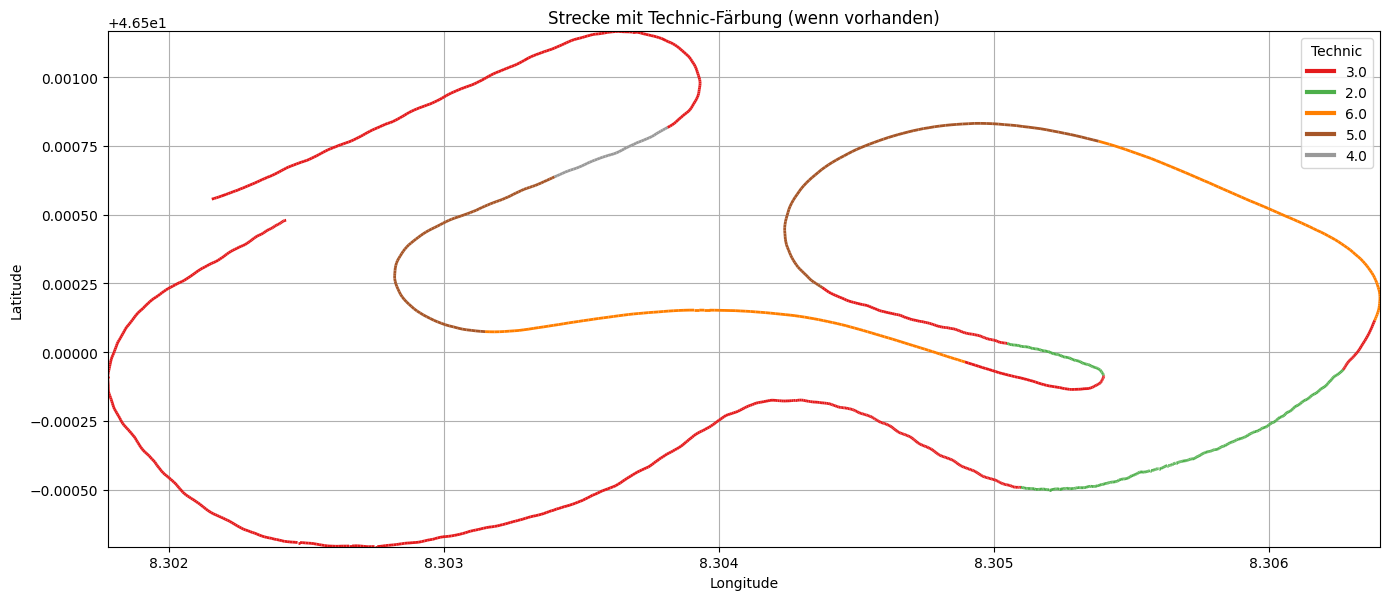

In [297]:
plot_technic_track(df, lat_col="latitude", lon_col="longitude", technic_col="technic")


# Testdaten erzeugen (Halbkreis mit Innerbody)



*   Ziel a_lr/a_vz
*   Lattitude / Longitude



In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_testdata_MB(R: float, V: float, show_plot: bool = True) -> pd.DataFrame:
    """
    Erzeugt Testdaten zur Körperbewegung auf einer Kreisbahn mit Schwerpunkt- und Schwankungsbewegung.

    Args:
        R (float): Radius der Kurve in Metern.
        V (float): Geschwindigkeit in m/s.
        show_plot (bool): Wenn True, wird die Bewegung visualisiert.

    Returns:
        pd.DataFrame: Enthält t, Schwerpunkt, Körperbewegung, Winkel, Schwankungen und Streckenlänge.
    """
    omega = V / R
    t = np.linspace(0, 2 * np.pi, num=500)

    # Schwerpunktbewegung (ideale Kreisbahn)
    x_sp = R * np.cos(omega * t)
    y_sp = R * np.sin(omega * t)
    phi = omega * t

    # Schwankungen simulieren
    omega_inner = 2 * np.pi / 5
    x_LR = 0.2 * np.sin(omega_inner * t)
    y_vz = 0.5 * np.sin(omega_inner * t)

    # Körperbewegung mit Schwankung
    x = x_sp + x_LR * np.cos(phi) - y_vz * np.sin(phi)
    y = y_sp + x_LR * np.sin(phi) + y_vz * np.cos(phi)

    # DataFrame
    df = pd.DataFrame({
        "t": t,
        "x_sp": x_sp,
        "y_sp": y_sp,
        "x": x,
        "y": y,
        "phi": phi,
        "x_LR": x_LR,
        "y_vz": y_vz,
        "streckenlänge": np.pi * R
    })

    # Plot
    if show_plot:
        fig, axes = plt.subplots(1, 2, figsize=(18, 8))

        # Plot 1 – Linien
        axes[0].plot(df["x_sp"], df["y_sp"], color="blue", linestyle="--", label="Schwerpunkt")
        axes[0].plot(df["x"], df["y"], color="red", linestyle="-", alpha=0.7, label="Körperbewegung")
        axes[0].scatter(df["x_sp"].iloc[0], df["y_sp"].iloc[0], color="green", label="Start", zorder=3, s=50)
        axes[0].scatter(df["x_sp"].iloc[-1], df["y_sp"].iloc[-1], color="red", label="Ende", zorder=3, s=50)
        axes[0].set_xlabel("X (Querbewegung in Meter)")
        axes[0].set_ylabel("Y (Vorwärtsbewegung in Meter)")
        axes[0].set_title("Schwerpunkt vs. Körperbewegung (Linien)")
        axes[0].legend()
        axes[0].grid(True, linestyle="--", linewidth=0.5)

        # Plot 2 – Punkte
        axes[1].scatter(df["x_sp"], df["y_sp"], color="blue", label="Schwerpunkt", s=2)
        axes[1].scatter(df["x"], df["y"], color="red", label="Körperbewegung", s=2)
        axes[1].scatter(df["x_sp"].iloc[0], df["y_sp"].iloc[0], color="green", label="Start", zorder=3, s=50)
        axes[1].scatter(df["x_sp"].iloc[-1], df["y_sp"].iloc[-1], color="red", label="Ende", zorder=3, s=50)
        axes[1].set_xlabel("X (Querbewegung in Meter)")
        axes[1].set_ylabel("Y (Vorwärtsbewegung in Meter)")
        axes[1].set_title("Echte Punkte (Diskret)")
        axes[1].legend()
        axes[1].grid(True, linestyle="--", linewidth=0.5)

        plt.tight_layout()
        plt.show()

    return df


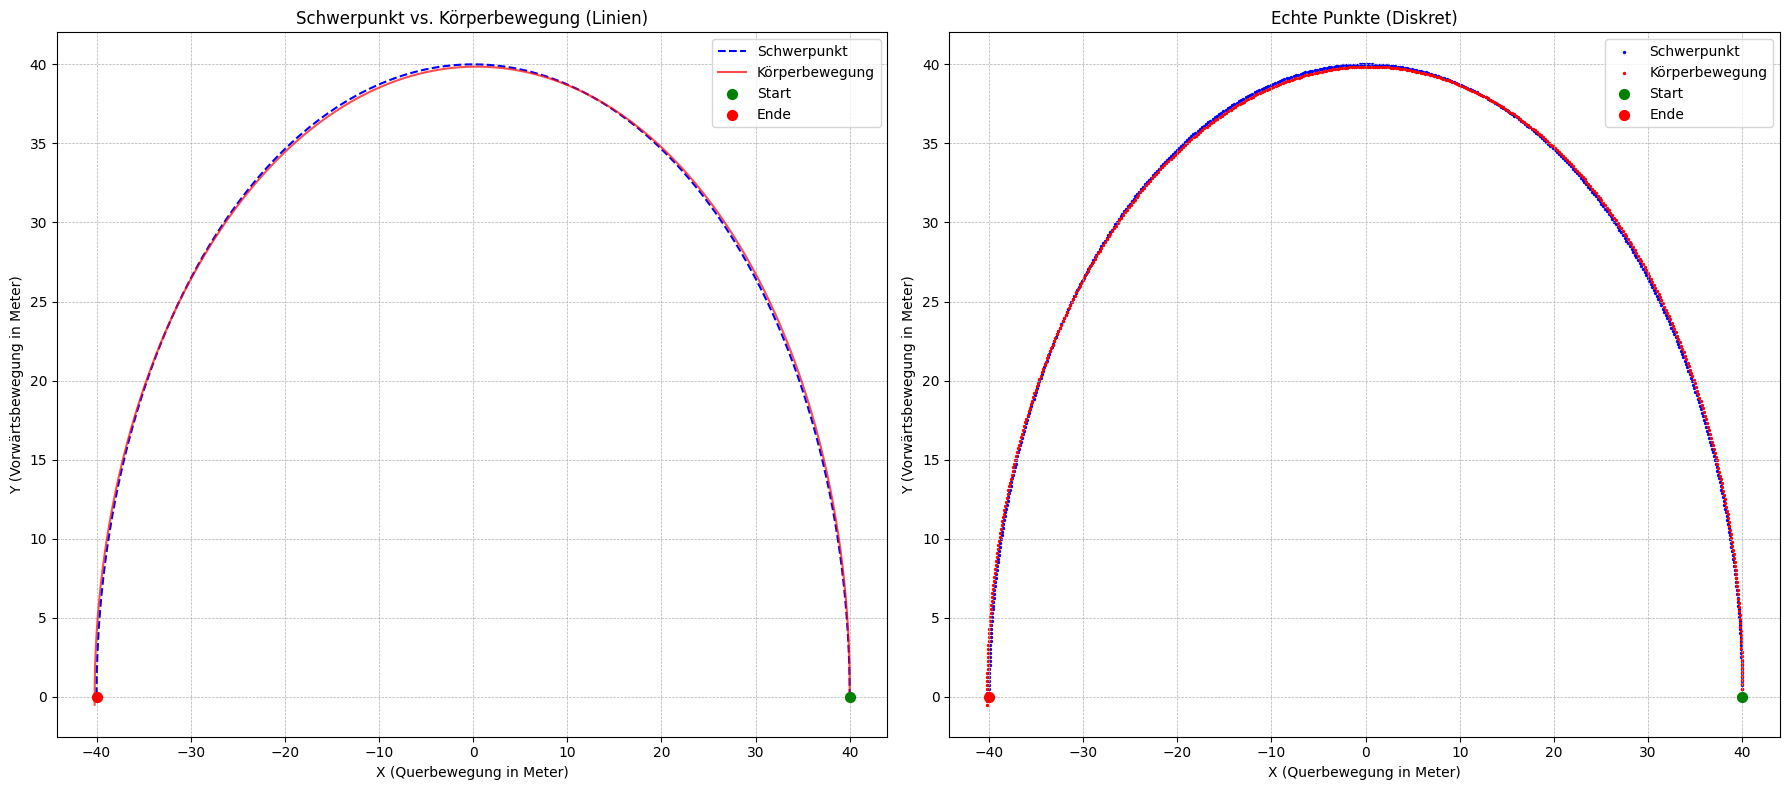

In [148]:
MB_test = generate_testdata_MB(R=40, V=20)


,t,x_sp,y_sp,x,y,phi,x_LR,y_vz,streckenlänge
0,0.000000,40.000000,0.000000e+00,40.000000,0.000000,0.000000,0.000000,0.000000,125.663706
1,0.012592,39.999207,2.518294e-01,40.002322,0.259760,0.006296,0.003164,0.007911,125.663706
2,0.025183,39.996829,5.036488e-01,40.002958,0.519548,0.012592,0.006328,0.015820,125.663706
3,0.037775,39.992866,7.554483e-01,40.001906,0.779349,0.018887,0.009490,0.023726,125.663706
4,0.050366,39.987317,1.007218e+00,39.999167,1.039151,0.025183,0.012650,0.031625,125.663706
...,...,...,...,...,...,...,...,...,...
495,6.232819,-39.987317,1.007218e+00,-40.199794,0.512528,3.116410,0.199953,0.499883,125.663706
496,6.245411,-39.992866,7.554483e-01,-40.202270,0.259323,3.122705,0.199997,0.499992,125.663706
497,6.258002,-39.996829,5.036488e-01,-40.203098,0.006232,3.129001,0.199990,0.499975,125.663706
498,6.270594,-39.999207,2.518294e-01,-40.202283,-0.246735,3.135297,0.199933,0.499833,125.663706


In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_testdata_LOF(
    R: float,
    V: float,
    periods: int = 24,
    A_xLR: float = 0.8,
    A_yVZ: float = 1.0,
    show_plot: bool = True
) -> pd.DataFrame:
    """
    Erzeugt Testdaten mit starker Körperbewegung (LOF) über eine Kreisbahn.

    Args:
        R (float): Radius der Kreisbahn in Metern.
        V (float): Geschwindigkeit in m/s.
        periods (int): Anzahl innerer Schwankungsperioden.
        A_xLR (float): Amplitude der seitlichen Kippbewegung.
        A_yVZ (float): Amplitude der Vorwärtsschwankung.
        show_plot (bool): Ob die Visualisierung angezeigt werden soll.

    Returns:
        pd.DataFrame: Testdaten mit Schwerpunkt- & Körperbewegung.
    """
    omega = V / R
    t = np.linspace(0, 2 * np.pi, num=500)
    phi = omega * t

    # Schwerpunkt
    x_sp = R * np.cos(omega * t)
    y_sp = R * np.sin(omega * t)

    # Schwankungen
    omega_inner = omega * periods
    x_LR = A_xLR * np.sin(omega_inner * t)
    y_vz = A_yVZ * np.sin(omega_inner * t)

    # Körperbewegung
    x = x_sp + x_LR * np.cos(phi) - y_vz * np.sin(phi)
    y = y_sp + x_LR * np.sin(phi) + y_vz * np.cos(phi)

    # DataFrame
    df = pd.DataFrame({
        "t": t,
        "x_sp": x_sp,
        "y_sp": y_sp,
        "x": x,
        "y": y,
        "phi": phi,
        "x_LR": x_LR,
        "y_vz": y_vz,
        "streckenlänge": np.pi * R
    })

    # Plot
    if show_plot:
        fig, axes = plt.subplots(1, 2, figsize=(18, 8))

        # Plot 1 – Linien
        axes[0].plot(df["x_sp"], df["y_sp"], color="blue", linestyle="--", label="Schwerpunkt")
        axes[0].plot(df["x"], df["y"], color="red", linestyle="-", alpha=0.7, label="Körperbewegung")
        axes[0].scatter(df["x_sp"].iloc[0], df["y_sp"].iloc[0], color="green", label="Start", zorder=3, s=50)
        axes[0].scatter(df["x_sp"].iloc[-1], df["y_sp"].iloc[-1], color="red", label="Ende", zorder=3, s=50)
        axes[0].set_xlabel("X (Querbewegung in Meter)")
        axes[0].set_ylabel("Y (Vorwärtsbewegung in Meter)")
        axes[0].set_title("Schwerpunkt vs. Körperbewegung (Linien)")
        axes[0].legend()
        axes[0].grid(True, linestyle="--", linewidth=0.5)

        # Plot 2 – Punkte
        axes[1].scatter(df["x_sp"], df["y_sp"], color="blue", label="Schwerpunkt", s=2)
        axes[1].scatter(df["x"], df["y"], color="red", label="Körperbewegung", s=2)
        axes[1].scatter(df["x_sp"].iloc[0], df["y_sp"].iloc[0], color="green", label="Start", zorder=3, s=50)
        axes[1].scatter(df["x_sp"].iloc[-1], df["y_sp"].iloc[-1], color="red", label="Ende", zorder=3, s=50)
        axes[1].set_xlabel("X (Querbewegung in Meter)")
        axes[1].set_ylabel("Y (Vorwärtsbewegung in Meter)")
        axes[1].set_title("Echte Punkte (Diskret)")
        axes[1].legend()
        axes[1].grid(True, linestyle="--", linewidth=0.5)

        plt.tight_layout()
        plt.show()

        df["technic"] = "1"

    return df


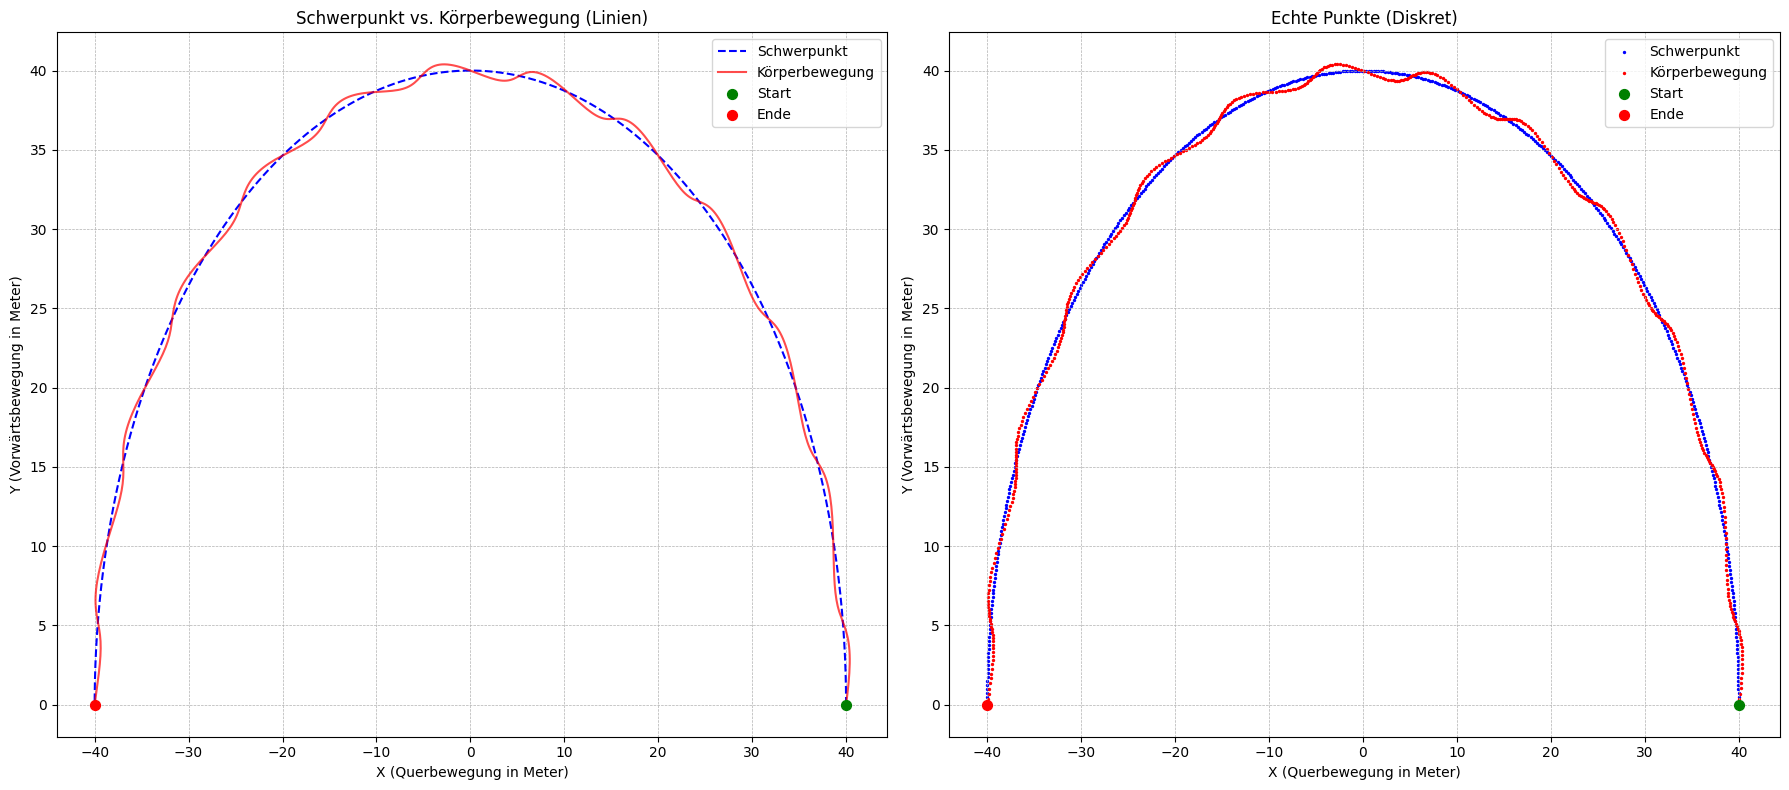

In [361]:
df_lof = generate_testdata_LOF(R=40, V=20, periods=24, A_xLR=0.5, A_yVZ=0.6)

In [362]:
df_lof

,t,x_sp,y_sp,x,y,phi,x_LR,y_vz,streckenlänge,technic
0,0.000000,40.000000,0.000000e+00,40.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,125.663706,1
1,0.012592,39.999207,2.518294e-01,40.073899,3.426161e-01,0.006296,7.526218e-02,9.031461e-02,125.663706,1
2,0.025183,39.996829,5.036488e-01,40.143378,6.840796e-01,0.012592,1.488093e-01,1.785712e-01,125.663706,1
3,0.037775,39.992866,7.554483e-01,40.206830,1.022295e+00,0.018887,2.189655e-01,2.627586e-01,125.663706,1
4,0.050366,39.987317,1.007218e+00,40.262773,1.355223e+00,0.025183,2.841320e-01,3.409584e-01,125.663706,1
...,...,...,...,...,...,...,...,...,...,...
495,6.232819,-39.987317,1.007218e+00,-39.694689,1.340914e+00,3.116410,-2.841320e-01,-3.409584e-01,125.663706,1
496,6.245411,-39.992866,7.554483e-01,-39.768977,1.014025e+00,3.122705,-2.189655e-01,-2.627586e-01,125.663706,1
497,6.258002,-39.996829,5.036488e-01,-39.845783,6.803322e-01,3.129001,-1.488093e-01,-1.785712e-01,125.663706,1
498,6.270594,-39.999207,2.518294e-01,-39.923378,3.416684e-01,3.135297,-7.526218e-02,-9.031461e-02,125.663706,1


# Datensatz kofigurieren und zu csv

In [363]:
# Erforderliche Bibliotheken erneut importieren
from datetime import datetime, timedelta

# **Funktion zur Umwandlung der Testdaten in das gewünschte GPS-Format mit initial_timestamp & timedelta Korrektur**
def convert_to_gps_format(df_testdata, start_lat=46.500480, start_lon=8.302427, elevation_base=1350, tf_id=11783):
    """
    Wandelt x/y-Meterwerte aus df_testdata in realistische GPS-Koordinaten (Latitude/Longitude) um.
    Berechnet Geschwindigkeit, Höhe und fügt Zeitstempel hinzu.

    Parameter:
    df_testdata (DataFrame): Enthält die simulierten Testdaten mit x, y, t.
    start_lat (float): Startlatitude für die GPS-Umrechnung.
    start_lon (float): Startlongitude für die GPS-Umrechnung.
    elevation_base (float): Basishöhe in Metern.
    tf_id (int): ID für die GPS-Daten.

    Rückgabe:
    DataFrame: Formatierte GPS-Daten mit Geschwindigkeit, Höhe und Timestamps.
    """

    # **1️⃣ Startzeitpunkt bestimmen (jetzt explizit innerhalb der Funktion definiert)**
    initial_timestamp = datetime.now()  # Setzt den Startzeitpunkt auf die aktuelle Zeit

    # **2️⃣ Umrechnung der X- und Y-Werte in echte Längen-/Breitengrade**
    latitude_corrected = []
    longitude_corrected = []

    for _, row in df_testdata.iterrows():
        # Berechnung der neuen GPS-Koordinaten relativ zum Startpunkt
        new_lat = geodesic(meters=row["y"]).destination((start_lat, start_lon), 0).latitude
        new_lon = geodesic(meters=row["x"]).destination((start_lat, start_lon), 90).longitude

        latitude_corrected.append(new_lat)
        longitude_corrected.append(new_lon)

    # **3️⃣ Geschwindigkeit berechnen (Ableitung der Strecke nach Zeit)**
    dt = np.diff(df_testdata["t"], prepend=df_testdata["t"].iloc[0])  # Zeitschritt
    dx = np.diff(df_testdata["x"], prepend=df_testdata["x"].iloc[0])
    dy = np.diff(df_testdata["y"], prepend=df_testdata["y"].iloc[0])

    # Verhindere Division durch 0 für den ersten Zeitschritt
    dt[dt == 0] = np.nan
    speed_measured = np.sqrt(dx**2 + dy**2) / dt  # Geschwindigkeit = Strecke / Zeit

    # **4️⃣ Erstellen des neuen DataFrames mit echten GPS-Koordinaten**
    df_final = pd.DataFrame({
        "latitude": latitude_corrected,
        "longitude": longitude_corrected,
        "elevation": elevation_base + 0.5 * np.sin(df_testdata["phi"]),  # Leichte Höhenvariation für Realismus
        "speed_measured": speed_measured,  # Berechnete Geschwindigkeit
        "timestamp": [(initial_timestamp + timedelta(seconds=float(t))).isoformat() + "000" for t in df_testdata["t"]],  # ISO-Timestamp
        "discipline_from_name": "XC",  # Konstante Spalte
        "tf_id": tf_id  # Konstante ID

    })
    df_final["technic"]= "1"
    # **5️⃣ NaN-Werte in "speed_measured" entfernen (durch Interpolation ersetzen)**
    df_final["speed_measured"] = df_final["speed_measured"].interpolate(method='linear')

    # **6️⃣ Erste Zeile mit NaN-Wert entfernen (falls vorhanden)**
    df_final = df_final.dropna(subset=["speed_measured"]).reset_index(drop=True)

    # **7️⃣ Timestamp-Format korrigieren**
    df_final["timestamp"] = df_final["timestamp"].apply(
        lambda x: datetime.strptime(x[:23], "%Y-%m-%dT%H:%M:%S.%f").strftime("%Y%m%dT%H%M%S%f")[:-3]  # Entfernt letzte 3 Stellen für Millisekundenpräzision
    )
    xc = SkiCrossCountry(df=df_final)
    df_final = xc.compute()



    return df_final

In [364]:
df_lof = convert_to_gps_format(df_lof)
df_lof

2025-03-25 15:32:40.828 | INFO     | physics_computer.ski_xc:_compute_xc_specific_physical_size:20 - xc specific


,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,technic,time,date,...,shifted_x_norm,shifted_y_norm,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v
0,46.500483,8.302949,1350.003148,27.835738,20250325T153234945,XC,11783,1,15:32:34.9,2025-03-25,...,NaN,NaN,NaN,NaN,0.000000,0.000000,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
1,46.500486,8.302950,1350.006296,27.674136,20250325T153234957,XC,11783,1,15:32:34.9,2025-03-25,...,0.000000,0.000000,46.500483,8.302949,0.348460,0.348333,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
2,46.500489,8.302951,1350.009443,27.329141,20250325T153234970,XC,11783,1,15:32:34.9,2025-03-25,...,0.072463,0.340713,46.500486,8.302950,0.344116,0.343991,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
3,46.500492,8.302952,1350.012590,26.811212,20250325T153234982,XC,11783,1,15:32:34.9,2025-03-25,...,0.138872,0.678232,46.500489,8.302951,0.337595,0.337472,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
4,46.500495,8.302952,1350.015737,26.135759,20250325T153234995,XC,11783,1,15:32:34.9,2025-03-25,...,0.197731,1.010532,46.500492,8.302952,0.329090,0.328970,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,46.500492,8.301910,1350.012590,25.894764,20250325T153241165,XC,11783,1,15:32:41.1,2025-03-25,...,-79.654663,2.019797,46.500495,8.301911,0.326055,0.325936,2025-03-25 15:32:41.100,2025-03-25 15:32:41.100,0.0,0.000000
495,46.500489,8.301909,1350.009443,26.622907,20250325T153241177,XC,11783,1,15:32:41.1,2025-03-25,...,-79.727556,1.702116,46.500492,8.301910,0.335224,0.335101,2025-03-25 15:32:41.100,2025-03-25 15:32:41.100,0.0,0.000000
496,46.500486,8.301908,1350.006296,27.194236,20250325T153241190,XC,11783,1,15:32:41.1,2025-03-25,...,-79.804702,1.376015,46.500489,8.301909,0.342418,0.342293,2025-03-25 15:32:41.100,2025-03-25 15:32:41.100,0.0,0.000000
497,46.500483,8.301907,1350.003148,27.593050,20250325T153241203,XC,11783,1,15:32:41.2,2025-03-25,...,-79.884425,1.043136,46.500486,8.301908,0.347439,0.347313,2025-03-25 15:32:41.200,2025-03-25 15:32:41.100,0.1,3.473126


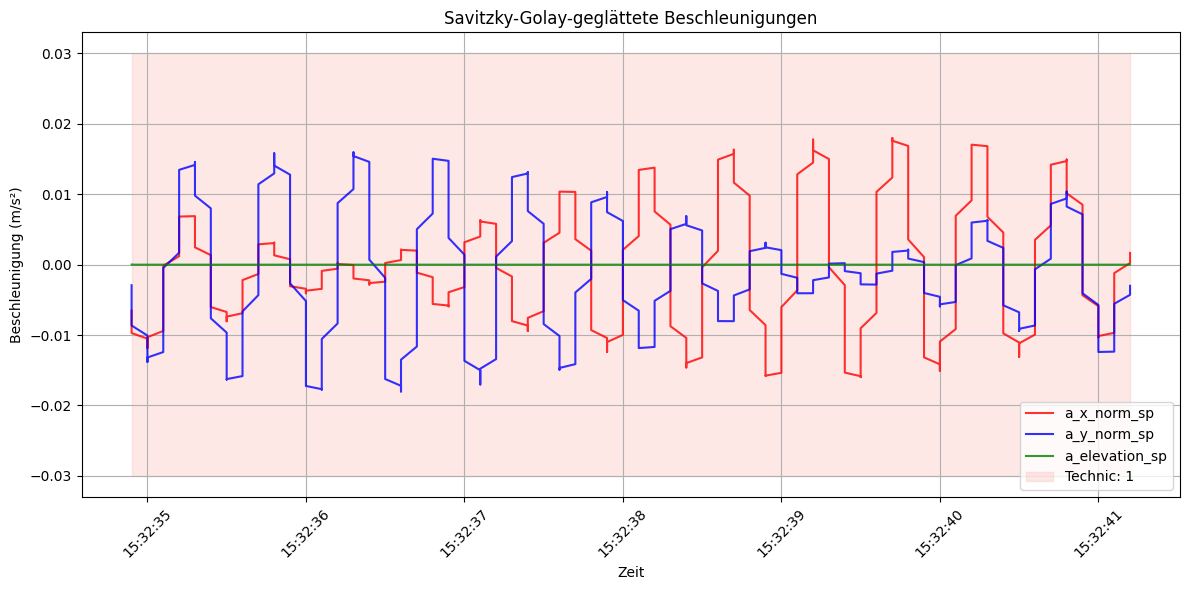

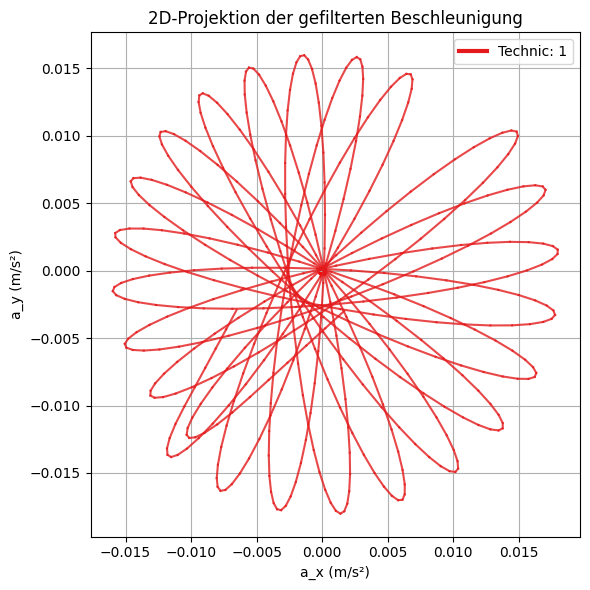

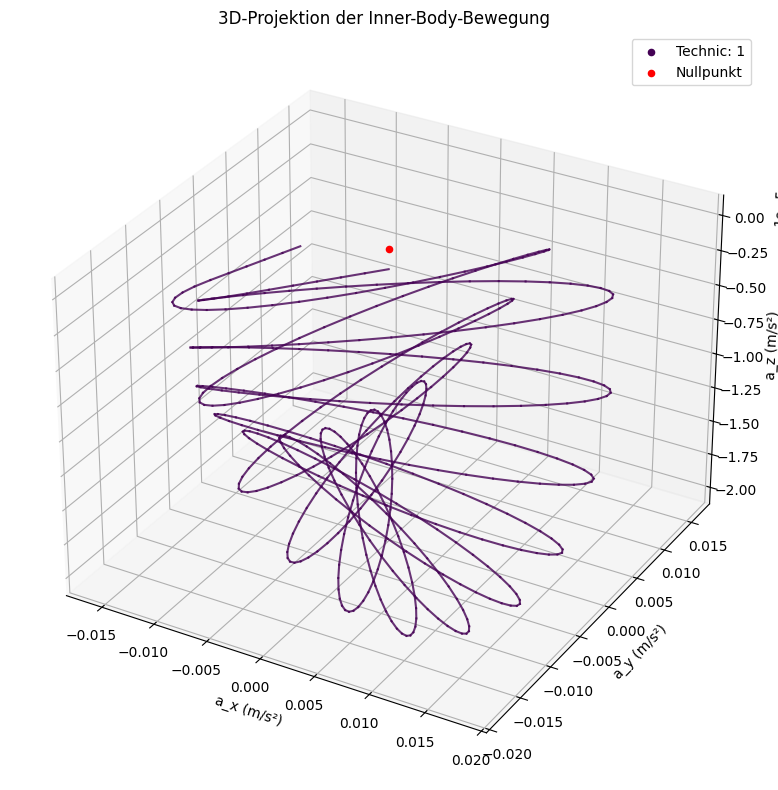

In [366]:
df_lof = Savitzky_golay(df_lof,filter_for=("x_norm","y_norm", "elevation"),window_size=11,order=3)

# Vorwärtsbewegung Euklidisch

In [367]:
df_lof

,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,technic,time,date,...,shifted_x_norm,shifted_y_norm,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v
0,46.500483,8.302949,1350.003148,27.835738,20250325T153234945,XC,11783,1,15:32:34.9,2025-03-25,...,NaN,NaN,NaN,NaN,0.000000,0.000000,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
1,46.500486,8.302950,1350.006296,27.674136,20250325T153234957,XC,11783,1,15:32:34.9,2025-03-25,...,0.000000,0.000000,46.500483,8.302949,0.348460,0.348333,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
2,46.500489,8.302951,1350.009443,27.329141,20250325T153234970,XC,11783,1,15:32:34.9,2025-03-25,...,0.072463,0.340713,46.500486,8.302950,0.344116,0.343991,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
3,46.500492,8.302952,1350.012590,26.811212,20250325T153234982,XC,11783,1,15:32:34.9,2025-03-25,...,0.138872,0.678232,46.500489,8.302951,0.337595,0.337472,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
4,46.500495,8.302952,1350.015737,26.135759,20250325T153234995,XC,11783,1,15:32:34.9,2025-03-25,...,0.197731,1.010532,46.500492,8.302952,0.329090,0.328970,2025-03-25 15:32:34.900,2025-03-25 15:32:34.900,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,46.500492,8.301910,1350.012590,25.894764,20250325T153241165,XC,11783,1,15:32:41.1,2025-03-25,...,-79.654663,2.019797,46.500495,8.301911,0.326055,0.325936,2025-03-25 15:32:41.100,2025-03-25 15:32:41.100,0.0,0.000000
495,46.500489,8.301909,1350.009443,26.622907,20250325T153241177,XC,11783,1,15:32:41.1,2025-03-25,...,-79.727556,1.702116,46.500492,8.301910,0.335224,0.335101,2025-03-25 15:32:41.100,2025-03-25 15:32:41.100,0.0,0.000000
496,46.500486,8.301908,1350.006296,27.194236,20250325T153241190,XC,11783,1,15:32:41.1,2025-03-25,...,-79.804702,1.376015,46.500489,8.301909,0.342418,0.342293,2025-03-25 15:32:41.100,2025-03-25 15:32:41.100,0.0,0.000000
497,46.500483,8.301907,1350.003148,27.593050,20250325T153241203,XC,11783,1,15:32:41.2,2025-03-25,...,-79.884425,1.043136,46.500486,8.301908,0.347439,0.347313,2025-03-25 15:32:41.200,2025-03-25 15:32:41.100,0.1,3.473126


In [368]:
def smooth_and_euklid(df: pd.DataFrame, window_size: int = 91, order: int = 3) -> pd.DataFrame:
    df_mod = df.copy()

    # === 1. Glätten ===
    df_mod["latitude_smooth"] = savgol_filter(df_mod["latitude"], window_size, order)
    df_mod["longitude_smooth"] = savgol_filter(df_mod["longitude"], window_size, order)

    # === 2. Tangentenwinkel
    dx = np.diff(df_mod["longitude_smooth"])
    dy = np.diff(df_mod["latitude_smooth"])
    phi = np.arctan2(dy, dx)
    phi = np.append(phi, phi[-1])
    df_mod["phi_tangent"] = phi
    df_mod["phi_tangent_deg"] = np.degrees(phi)

    # === 3. Neue Richtung
    df_mod["dx"] = df_mod["longitude"].diff()
    df_mod["dy"] = df_mod["latitude"].diff()
    df_mod["distance"] = np.sqrt(df_mod["dx"]**2 + df_mod["dy"]**2)

    phi_rad = np.radians(df_mod["phi_tangent"])
    df_mod["dx_new"] = df_mod["distance"] * np.cos(phi_rad)
    df_mod["dy_new"] = df_mod["distance"] * np.sin(phi_rad)

    df_mod["longitude_new"] = df_mod["longitude"].iloc[0] + np.cumsum(df_mod["dx_new"].fillna(0))
    df_mod["latitude_new"] = df_mod["latitude"].iloc[0] + np.cumsum(df_mod["dy_new"].fillna(0))



    # === Plot 1: Original
    plt.figure(figsize=(10, 6))
    plt.plot(df_mod["longitude"], df_mod["latitude"], label="Original", color="black", linewidth=1)
    plt.scatter(df_mod["longitude"].iloc[0], df_mod["latitude"].iloc[0], color="green", label="Start", s=60)
    plt.scatter(df_mod["longitude"].iloc[-1], df_mod["latitude"].iloc[-1], color="red", label="Ende", s=60)
    plt.title("Originale GPS-Strecke")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


    # === Plot 2: Geglättet (Savitzky-Golay)
    plt.figure(figsize=(10, 6))
    plt.plot(df_mod["longitude_smooth"], df_mod["latitude_smooth"], label="Geglättet (Savitzky-Golay)", color="blue", linewidth=1)
    plt.scatter(df_mod["longitude_smooth"].iloc[0], df_mod["latitude_smooth"].iloc[0], color="green", label="Start", s=60)
    plt.scatter(df_mod["longitude_smooth"].iloc[-1], df_mod["latitude_smooth"].iloc[-1], color="red", label="Ende", s=60)
    plt.title("Geglättete GPS-Strecke (Savitzky-Golay)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


    # === Plot 2: Original vs. Rekonstruiert via Tangente
    plt.figure(figsize=(10, 6))
    plt.plot(df_mod["longitude"], df_mod["latitude"], label="Original", color="black", linewidth=1)
    plt.plot(df_mod["longitude_new"], df_mod["latitude_new"], label="Rekonstruiert (Tangente)", color="red", linewidth=1)
    plt.scatter(df_mod["longitude"].iloc[0], df_mod["latitude"].iloc[0], color="green", label="Start", s=60)
    plt.scatter(df_mod["longitude"].iloc[-1], df_mod["latitude"].iloc[-1], color="red", label="Ende", s=60)
    plt.title("Original vs. Rekonstruiert via Tangente")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()






    # === 5. Koordinaten ersetzen
    df_mod["longitude"] = df_mod["longitude_new"]
    df_mod["latitude"] = df_mod["latitude_new"]
    df_mod = df_mod.drop(columns=["longitude_new", "latitude_new"])

    # === 6. Drop NaNs (nur zur Sicherheit)
    df_mod = df_mod.dropna(subset=["latitude", "longitude"])

    # === 7. Modellberechnung
    xc = SkiCrossCountry(df=df_mod)
    df_mod = xc.compute()

    # === 8. Ausgabe
    print("Erkannte Techniken:", df_mod["technic"].unique())
    return df_mod


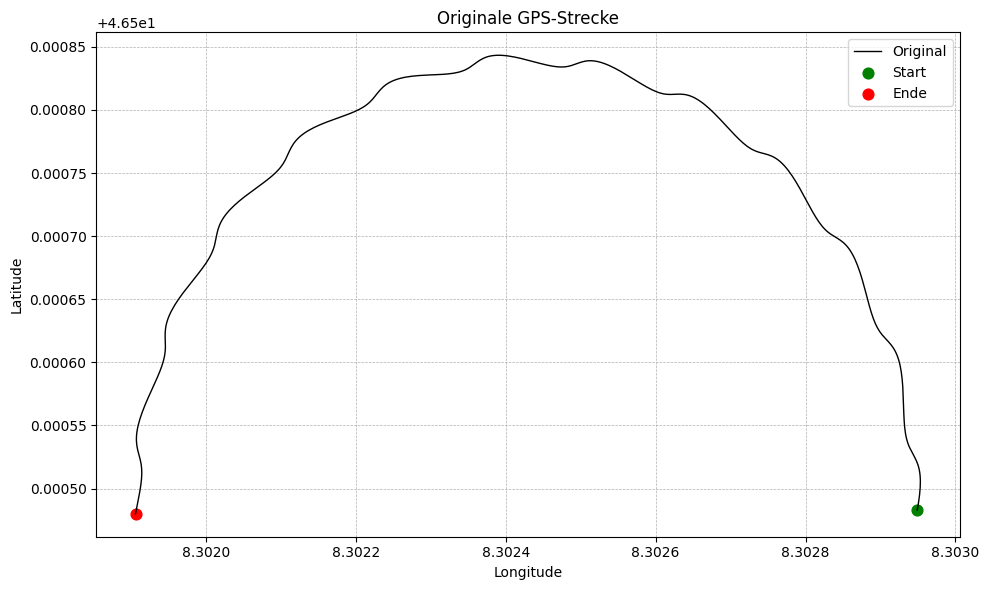

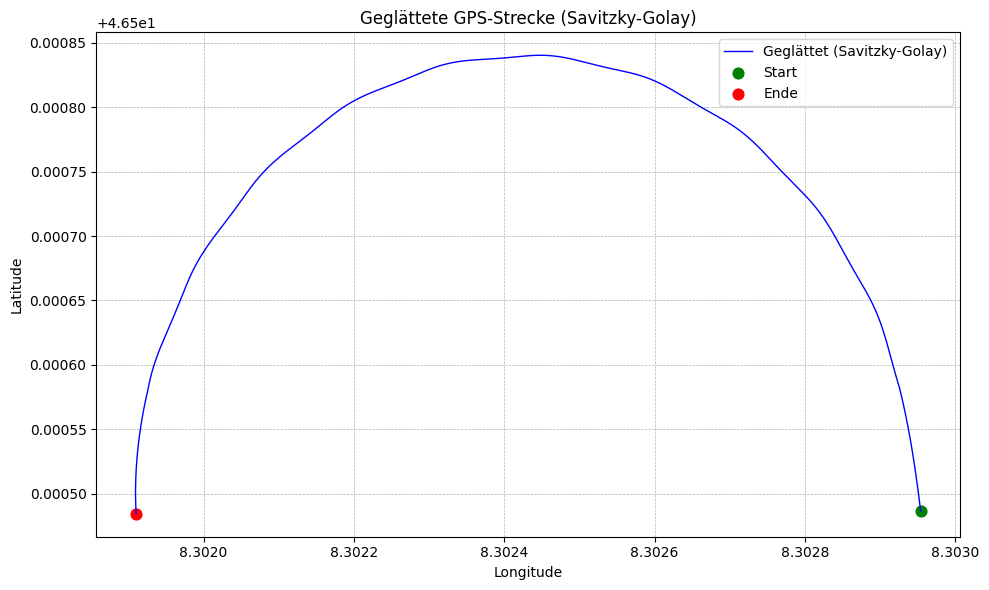

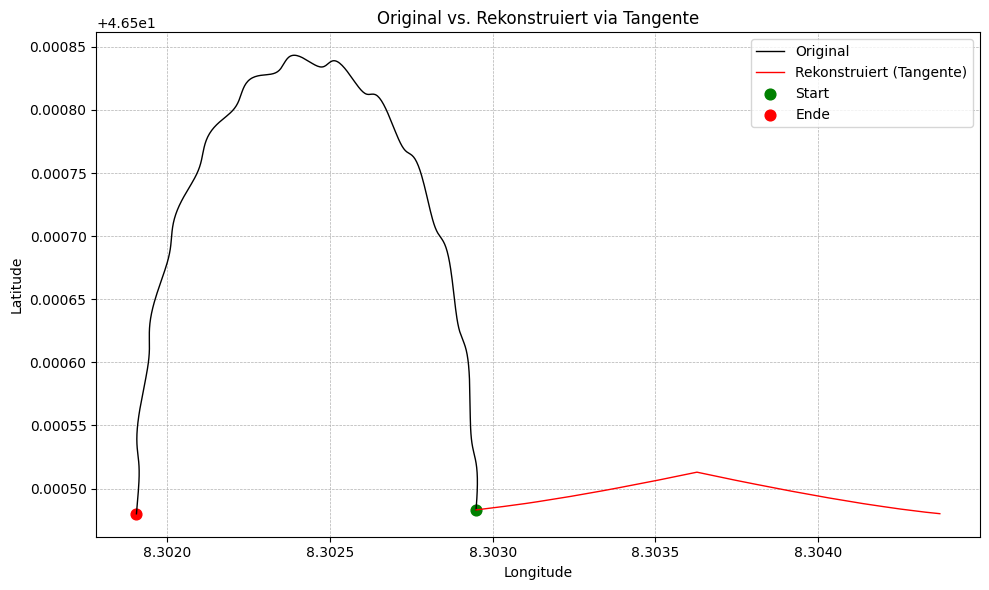

2025-03-25 15:33:06.674 | INFO     | physics_computer.ski_xc:_compute_xc_specific_physical_size:20 - xc specific


Erkannte Techniken: ['1']


In [369]:
df_lof = smooth_and_euklid(df_lof, window_size=91)

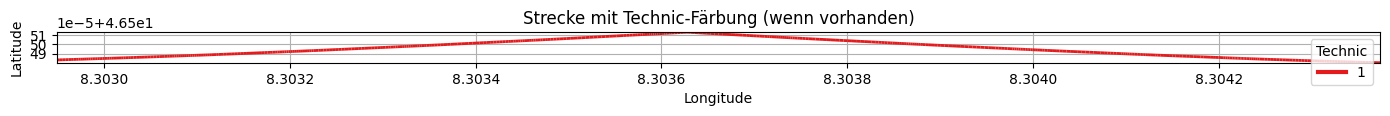

In [370]:
plot_technic_track(df_lof, lat_col="latitude", lon_col="longitude", technic_col="technic")

# Test Vorwärtsbewegung_Ableitung

In [355]:
df_lof.columns

Index(['latitude', 'longitude', 'elevation', 'speed_measured', 'timestamp',
       'discipline_from_name', 'tf_id', 'time', 'date', 'x_norm', 'y_norm',
       'x_rel', 'y_rel', 'x_norm_sp', 'v_x_norm_sp', 'a_x_norm_sp',
       'y_norm_sp', 'v_y_norm_sp', 'a_y_norm_sp', 'elevation_sp',
       'v_elevation_sp', 'a_elevation_sp', 'k', 'k_xy', 'shifted_x_norm',
       'shifted_y_norm', 'shifted_latitude', 'shifted_longitude', 'distance',
       'distance_x_y', 'date_time', 'shifted_date_time', 'time_delta', 'v'],
      dtype='object')

In [300]:
def smooth_and_acceleration(df: pd.DataFrame, window_size: int = 91, order: int = 3) -> pd.DataFrame:
    df_mod = df.copy()

    # === 1. Glätten ===
    df_mod["latitude_smooth"] = savgol_filter(df_mod["latitude"], window_size, order)
    df_mod["longitude_smooth"] = savgol_filter(df_mod["longitude"], window_size, order)

    # === 2. Tangentenwinkel
    dx = np.diff(df_mod["longitude_smooth"])
    dy = np.diff(df_mod["latitude_smooth"])
    phi = np.arctan2(dy, dx)
    phi = np.append(phi, phi[-1])
    df_mod["phi_tangent"] = phi
    df_mod["phi_tangent_deg"] = np.degrees(phi)

    # === 3. Neue Richtung
    df_mod["dx"] = df_mod["longitude"].diff()
    df_mod["dy"] = df_mod["latitude"].diff()
    df_mod["distance"] = np.sqrt(df_mod["dx"]**2 + df_mod["dy"]**2)

    phi_rad = np.radians(df_mod["phi_tangent"])
    df_mod["dx_new"] = df_mod["distance"] * np.cos(phi_rad)
    df_mod["dy_new"] = df_mod["distance"] * np.sin(phi_rad)

    df_mod["longitude_new"] = df_mod["longitude"].iloc[0] + np.cumsum(df_mod["dx_new"].fillna(0))
    df_mod["latitude_new"] = df_mod["latitude"].iloc[0] + np.cumsum(df_mod["dy_new"].fillna(0))


    # === Plot 1: Original
    plt.figure(figsize=(10, 6))
    plt.plot(df_mod["longitude"], df_mod["latitude"], label="Original", color="black", linewidth=1)
    plt.scatter(df_mod["longitude"].iloc[0], df_mod["latitude"].iloc[0], color="green", label="Start", s=60)
    plt.scatter(df_mod["longitude"].iloc[-1], df_mod["latitude"].iloc[-1], color="red", label="Ende", s=60)
    plt.title("Originale GPS-Strecke")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


    # === Plot 2: Geglättet (Savitzky-Golay)
    plt.figure(figsize=(10, 6))
    plt.plot(df_mod["longitude_smooth"], df_mod["latitude_smooth"], label="Geglättet (Savitzky-Golay)", color="blue", linewidth=1)
    plt.scatter(df_mod["longitude_smooth"].iloc[0], df_mod["latitude_smooth"].iloc[0], color="green", label="Start", s=60)
    plt.scatter(df_mod["longitude_smooth"].iloc[-1], df_mod["latitude_smooth"].iloc[-1], color="red", label="Ende", s=60)
    plt.title("Geglättete GPS-Strecke (Savitzky-Golay)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()





    # === 6. Drop NaNs (nur zur Sicherheit)
    df_mod = df_mod.dropna(subset=["latitude", "longitude"])

    # === 7. Modellberechnung
    xc = SkiCrossCountry(df=df_mod)
    df_mod = xc.compute()


    # Winkel auf orginale Beschleunigungen berechnet aus xc Compute einfügen
    # Resultate gemäss weiter untenr





    # === 8. Ausgabe
    print("Erkannte Techniken:", df_mod["technic"].unique())
    return df_mod


In [ ]:
xc = SkiCrossCountry(df=df_final_corrected_LOF)
df_modified = xc.compute()
print(df_modified.columns)

df_modified['technic']="1"
df_modified

2025-03-25 09:20:49.099 | INFO     | __main__:_compute_xc_specific_physical_size:23 - Cross-Country spezifische Berechnungen werden durchgeführt.


Index(['latitude', 'longitude', 'elevation', 'speed_measured', 'timestamp',
       'discipline_from_name', 'tf_id', 'time', 'date', 'x_norm', 'y_norm',
       'x_rel', 'y_rel', 'x_norm_sp', 'v_x_norm_sp', 'a_x_norm_sp',
       'y_norm_sp', 'v_y_norm_sp', 'a_y_norm_sp', 'elevation_sp',
       'v_elevation_sp', 'a_elevation_sp', 'k', 'k_xy', 'shifted_x_norm',
       'shifted_y_norm', 'shifted_latitude', 'shifted_longitude', 'distance',
       'distance_x_y', 'date_time', 'shifted_date_time', 'time_delta', 'v'],
      dtype='object')


,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,shifted_y_norm,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v,technic
0,46.500484,8.302950,1350.003148,33.372797,20250325T092022716,XC,11783,09:20:22.7,2025-03-25,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1
1,46.500487,8.302951,1350.006296,33.086054,20250325T092022729,XC,11783,09:20:22.7,2025-03-25,0.115974,...,0.000000,46.500484,8.302950,0.416605,0.416453,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1
2,46.500491,8.302952,1350.009443,32.485610,20250325T092022741,XC,11783,09:20:22.7,2025-03-25,0.223142,...,0.399979,46.500487,8.302951,0.409044,0.408895,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1
3,46.500494,8.302954,1350.012590,31.589394,20250325T092022754,XC,11783,09:20:22.7,2025-03-25,0.319115,...,0.794580,46.500491,8.302952,0.397760,0.397614,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1
4,46.500498,8.302955,1350.015737,30.423880,20250325T092022767,XC,11783,09:20:22.7,2025-03-25,0.401764,...,1.180438,46.500494,8.302954,0.383084,0.382944,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,46.500494,8.301912,1350.012590,30.092357,20250325T092028936,XC,11783,09:20:28.9,2025-03-25,-79.594802,...,2.225372,46.500497,8.301914,0.378910,0.378771,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1
495,46.500491,8.301911,1350.009443,31.333540,20250325T092028949,XC,11783,09:20:28.9,2025-03-25,-79.713859,...,1.863337,46.500494,8.301912,0.394538,0.394394,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1
496,46.500487,8.301909,1350.006296,32.303964,20250325T092028962,XC,11783,09:20:28.9,2025-03-25,-79.837936,...,1.487342,46.500491,8.301911,0.406757,0.406609,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1
497,46.500484,8.301907,1350.003148,32.977518,20250325T092028974,XC,11783,09:20:28.9,2025-03-25,-79.964227,...,1.100127,46.500487,8.301909,0.415238,0.415087,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1


In [ ]:

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Kopie des DataFrames für Standardisierung
df_modified_Stan = df_modified.copy()

# Savitzky-Golay-Filter anwenden (Fenstergröße & Ordnung anpassen)
window_size = 91  # Muss ungerade sein! (Erhöhen = stärkere Glättung)
order = 3  # Polynomgrad (3 ist meist ein guter Wert)

# Glättung auf GPS-Daten anwenden
df_modified_Stan["latitude_smooth"] = savgol_filter(df_modified_Stan["latitude"], window_size, order)
df_modified_Stan["longitude_smooth"] = savgol_filter(df_modified_Stan["longitude"], window_size, order)

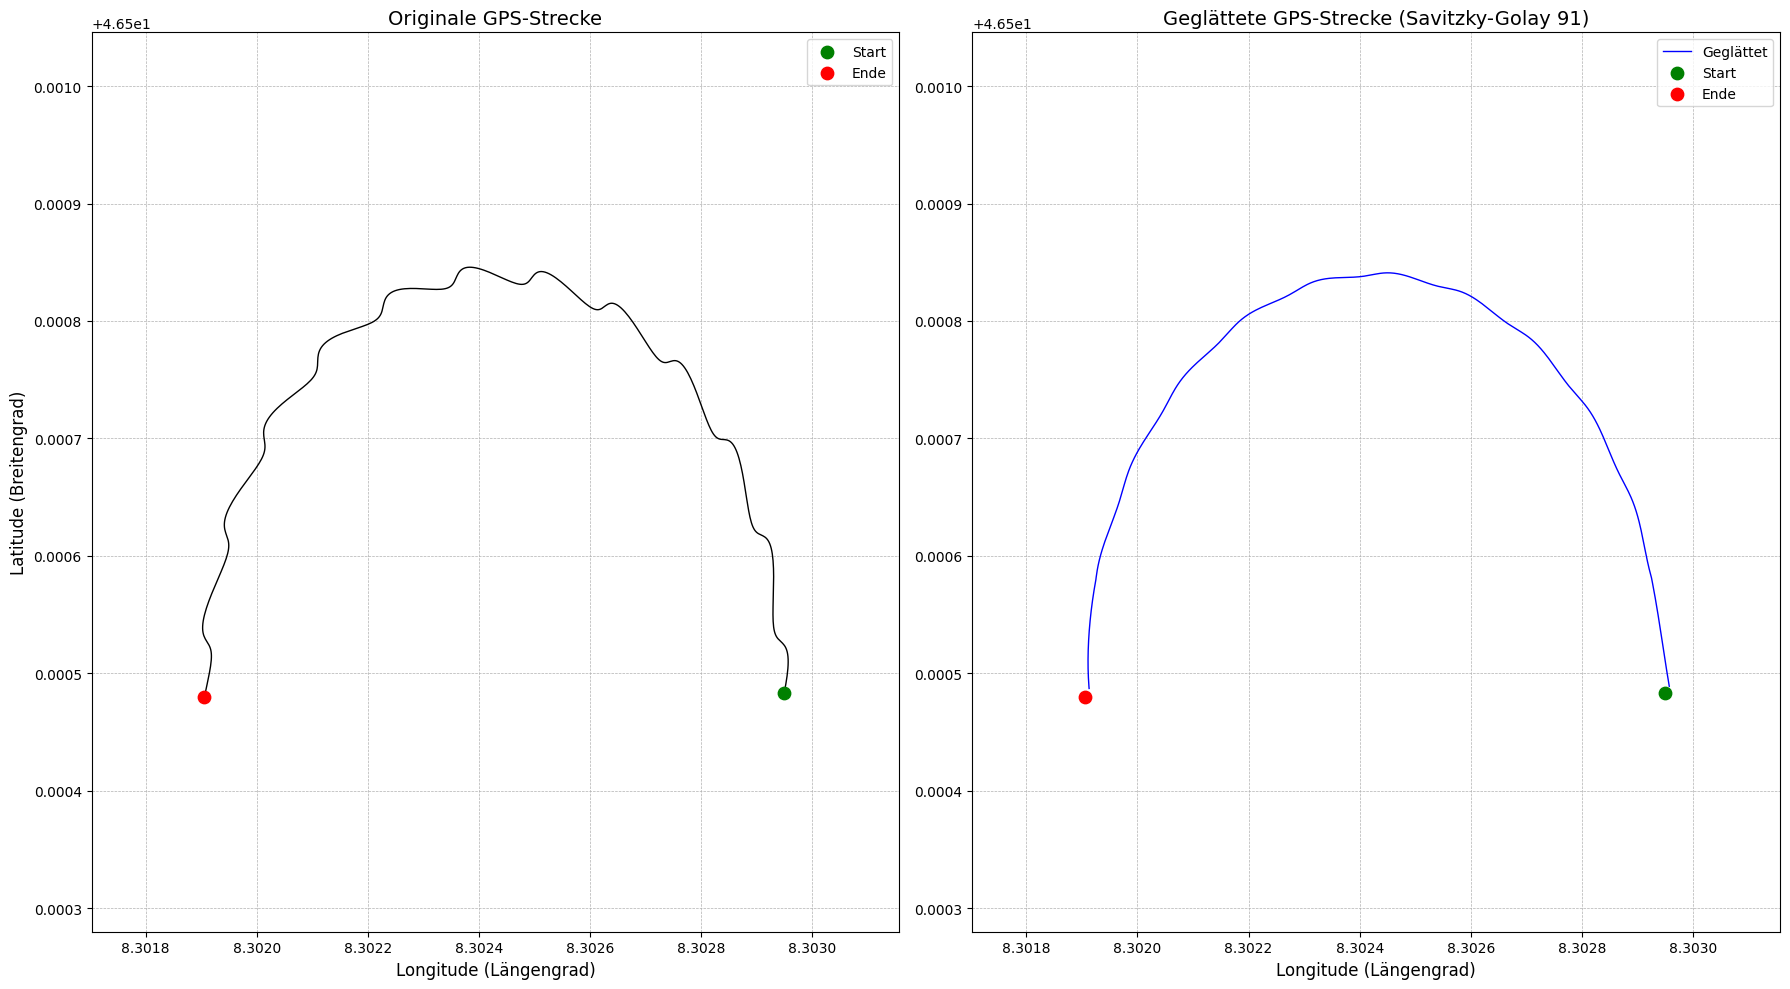

In [ ]:
# Größere Darstellung mit zwei Subplots nebeneinander
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Original GPS-Strecke
ax[0].plot(df_modified_Stan["longitude"], df_modified_Stan["latitude"], color="black", linestyle="-", alpha=1, linewidth=1)
ax[0].scatter(df_modified_Stan["longitude"].iloc[0], df_modified_Stan["latitude"].iloc[0], color="green", label="Start", zorder=3, s=80)
ax[0].scatter(df_modified_Stan["longitude"].iloc[-1], df_modified_Stan["latitude"].iloc[-1], color="red", label="Ende", zorder=3, s=80)
ax[0].set_title("Originale GPS-Strecke", fontsize=14)
ax[0].set_xlabel("Longitude (Längengrad)", fontsize=12)
ax[0].set_ylabel("Latitude (Breitengrad)", fontsize=12)
ax[0].legend()
ax[0].grid(True, linestyle="--", linewidth=0.5)

# Geglättete GPS-Strecke
ax[1].plot(df_modified_Stan["longitude_smooth"], df_modified_Stan["latitude_smooth"], color="blue", linestyle="-", linewidth=1, label="Geglättet")
ax[1].scatter(df_modified_Stan["longitude"].iloc[0], df_modified_Stan["latitude"].iloc[0], color="green", label="Start", zorder=3, s=80)
ax[1].scatter(df_modified_Stan["longitude"].iloc[-1], df_modified_Stan["latitude"].iloc[-1], color="red", label="Ende", zorder=3, s=80)
ax[1].set_title("Geglättete GPS-Strecke (Savitzky-Golay 91)", fontsize=14)
ax[1].set_xlabel("Longitude (Längengrad)", fontsize=12)
ax[1].legend()
ax[1].grid(True, linestyle="--", linewidth=0.5)

# Gemeinsame Achsenbegrenzung für besseren Vergleich
for a in ax:
    a.set_xlim(df_modified["longitude"].min() - 0.0002, df_modified["longitude"].max() + 0.0002)
    a.set_ylim(df_modified["latitude"].min() - 0.0002, df_modified["latitude"].max() + 0.0002)

# Anzeigen der Plots
plt.tight_layout()
plt.show()

In [ ]:
# Tangentenvektoren für jede Position berechnen
dx = np.diff(df_modified_Stan['longitude_smooth'])
dy = np.diff(df_modified_Stan['latitude_smooth'])
phi = np.arctan2(dy, dx)  # Lokaler Winkel für jede Position (Bogenmaß)

#  Ergänze phi für die letzte Zeile, damit die Dimensionen stimmen
phi = np.append(phi, phi[-1])

# Speichere phi als neue Spalte im DataFrame
df_modified_Stan['phi_tangent'] = phi

# Falls du die Winkel in Grad statt in Bogenmaß willst:
df_modified_Stan['phi_tangent_deg'] = np.degrees(phi)  # Umwandlung in Grad

print(df_modified_Stan.columns)
df_modified_Stan

Index(['latitude', 'longitude', 'elevation', 'speed_measured', 'timestamp',
       'discipline_from_name', 'tf_id', 'time', 'date', 'x_norm', 'y_norm',
       'x_rel', 'y_rel', 'x_norm_sp', 'v_x_norm_sp', 'a_x_norm_sp',
       'y_norm_sp', 'v_y_norm_sp', 'a_y_norm_sp', 'elevation_sp',
       'v_elevation_sp', 'a_elevation_sp', 'k', 'k_xy', 'shifted_x_norm',
       'shifted_y_norm', 'shifted_latitude', 'shifted_longitude', 'distance',
       'distance_x_y', 'date_time', 'shifted_date_time', 'time_delta', 'v',
       'technic', 'latitude_smooth', 'longitude_smooth', 'phi_tangent',
       'phi_tangent_deg'],
      dtype='object')


,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,distance_x_y,date_time,shifted_date_time,time_delta,v,technic,latitude_smooth,longitude_smooth,phi_tangent,phi_tangent_deg
0,46.500484,8.302950,1350.003148,33.372797,20250325T092022716,XC,11783,09:20:22.7,2025-03-25,0.000000,...,0.000000,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1,46.500489,8.302957,1.914084,109.668917
1,46.500487,8.302951,1350.006296,33.086054,20250325T092022729,XC,11783,09:20:22.7,2025-03-25,0.115974,...,0.416453,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1,46.500491,8.302957,1.910235,109.448424
2,46.500491,8.302952,1350.009443,32.485610,20250325T092022741,XC,11783,09:20:22.7,2025-03-25,0.223142,...,0.408895,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1,46.500493,8.302956,1.906640,109.242446
3,46.500494,8.302954,1350.012590,31.589394,20250325T092022754,XC,11783,09:20:22.7,2025-03-25,0.319115,...,0.397614,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1,46.500495,8.302955,1.903297,109.050902
4,46.500498,8.302955,1350.015737,30.423880,20250325T092022767,XC,11783,09:20:22.7,2025-03-25,0.401764,...,0.382944,2025-03-25 09:20:22.700,2025-03-25 09:20:22.700,0.0,0.0,1,46.500497,8.302955,1.900205,108.873706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,46.500494,8.301912,1350.012590,30.092357,20250325T092028936,XC,11783,09:20:28.9,2025-03-25,-79.594802,...,0.378771,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1,46.500494,8.301912,-1.448651,-83.001570
495,46.500491,8.301911,1350.009443,31.333540,20250325T092028949,XC,11783,09:20:28.9,2025-03-25,-79.713859,...,0.394394,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1,46.500493,8.301912,-1.433126,-82.112079
496,46.500487,8.301909,1350.006296,32.303964,20250325T092028962,XC,11783,09:20:28.9,2025-03-25,-79.837936,...,0.406609,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1,46.500491,8.301912,-1.417328,-81.206913
497,46.500484,8.301907,1350.003148,32.977518,20250325T092028974,XC,11783,09:20:28.9,2025-03-25,-79.964227,...,0.415087,2025-03-25 09:20:28.900,2025-03-25 09:20:28.900,0.0,0.0,1,46.500489,8.301913,-1.401249,-80.285628


In [ ]:
# **1️ Umwandlung von `phi_tangent_deg` in Radiant**
df_modified_Stan["phi_tangent_rad"] = np.deg2rad(df_modified_Stan["phi_tangent_deg"])

# **2️⃣ Rotationsmatrix auf die Beschleunigungswerte anwenden**
def rotate_acceleration(ax, ay, phi_rad):
    """Rotiert die Beschleunigungen basierend auf dem Winkel phi_rad"""
    cos_phi = np.cos(-phi_rad)
    sin_phi = np.sin(-phi_rad)

    ax_rot = cos_phi * ax - sin_phi * ay
    ay_rot = sin_phi * ax + cos_phi * ay

    return ax_rot, ay_rot

# Transformation für jede Zeile anwenden
df_modified_Stan["a_x_rot"], df_modified_Stan["a_y_rot"] = zip(*df_modified_Stan.apply(
    lambda row: rotate_acceleration(row["a_x_norm_sp"], row["a_y_norm_sp"], row["phi_tangent_rad"]), axis=1
))


df_modified_Stan[["a_x_norm_sp","a_y_norm_sp","phi_tangent_deg", "a_x_rot", "a_y_rot"]]

,a_x_norm_sp,a_y_norm_sp,phi_tangent_deg,a_x_rot,a_y_rot
0,-0.009591,-0.004956,109.668917,-0.001439,0.010699
1,-0.010851,-0.007319,109.448424,-0.003288,0.012669
2,-0.012112,-0.009682,109.242446,-0.005149,0.014626
3,-0.013372,-0.012044,109.050902,-0.007020,0.016571
4,-0.014632,-0.014407,108.873706,-0.008899,0.018506
...,...,...,...,...,...
494,-0.007432,-0.013434,-83.001570,0.012428,-0.009014
495,-0.005120,-0.011305,-82.112079,0.010496,-0.006624
496,-0.002809,-0.009177,-81.206913,0.008640,-0.004179
497,-0.000497,-0.007049,-80.285628,0.006864,-0.001679


In [ ]:
df_modified_Stan_ab = df_modified_Stan.copy()
df_modified_Stan_ab

,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,time_delta,v,technic,latitude_smooth,longitude_smooth,phi_tangent,phi_tangent_deg,phi_tangent_rad,a_x_rot,a_y_rot
0,46.500484,8.302950,1350.003148,33.372797,20250325T092022716,XC,11783,09:20:22.7,2025-03-25,0.000000,...,0.0,0.0,1,46.500489,8.302957,1.914084,109.668917,1.914084,-0.001439,0.010699
1,46.500487,8.302951,1350.006296,33.086054,20250325T092022729,XC,11783,09:20:22.7,2025-03-25,0.115974,...,0.0,0.0,1,46.500491,8.302957,1.910235,109.448424,1.910235,-0.003288,0.012669
2,46.500491,8.302952,1350.009443,32.485610,20250325T092022741,XC,11783,09:20:22.7,2025-03-25,0.223142,...,0.0,0.0,1,46.500493,8.302956,1.906640,109.242446,1.906640,-0.005149,0.014626
3,46.500494,8.302954,1350.012590,31.589394,20250325T092022754,XC,11783,09:20:22.7,2025-03-25,0.319115,...,0.0,0.0,1,46.500495,8.302955,1.903297,109.050902,1.903297,-0.007020,0.016571
4,46.500498,8.302955,1350.015737,30.423880,20250325T092022767,XC,11783,09:20:22.7,2025-03-25,0.401764,...,0.0,0.0,1,46.500497,8.302955,1.900205,108.873706,1.900205,-0.008899,0.018506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,46.500494,8.301912,1350.012590,30.092357,20250325T092028936,XC,11783,09:20:28.9,2025-03-25,-79.594802,...,0.0,0.0,1,46.500494,8.301912,-1.448651,-83.001570,-1.448651,0.012428,-0.009014
495,46.500491,8.301911,1350.009443,31.333540,20250325T092028949,XC,11783,09:20:28.9,2025-03-25,-79.713859,...,0.0,0.0,1,46.500493,8.301912,-1.433126,-82.112079,-1.433126,0.010496,-0.006624
496,46.500487,8.301909,1350.006296,32.303964,20250325T092028962,XC,11783,09:20:28.9,2025-03-25,-79.837936,...,0.0,0.0,1,46.500491,8.301912,-1.417328,-81.206913,-1.417328,0.008640,-0.004179
497,46.500484,8.301907,1350.003148,32.977518,20250325T092028974,XC,11783,09:20:28.9,2025-03-25,-79.964227,...,0.0,0.0,1,46.500489,8.301913,-1.401249,-80.285628,-1.401249,0.006864,-0.001679


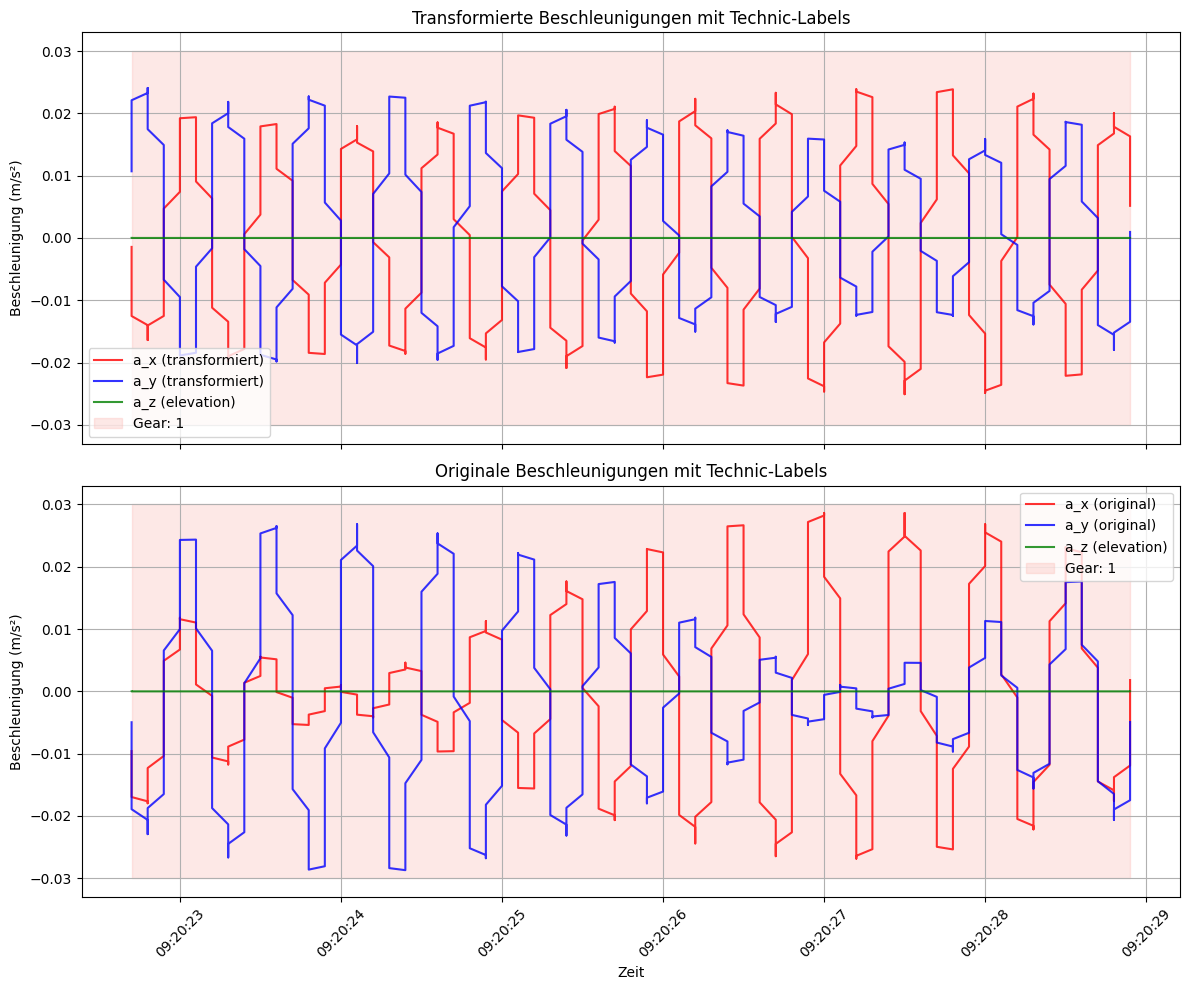

In [ ]:
# Sicherstellen, dass df_modified_Stan_ab die "technic"-Spalte enthält
if "technic" not in df_modified_Stan_ab.columns:
    raise ValueError("Die Spalte 'technic' fehlt in df_modified_Stan_ab! Stelle sicher, dass sie korrekt hinzugefügt wurde.")

# Zeitachse erstellen
time_series = pd.to_datetime(df_modified_Stan_ab["time"], format="%H:%M:%S.%f")  # Zeit in datetime umwandeln

# Gefilterte und Original-Beschleunigungen aus df_modified_Stan_ab
acc_x_rot = df_modified_Stan_ab["a_x_rot"]
acc_y_rot = df_modified_Stan_ab["a_y_rot"]
acc_z = df_modified_Stan_ab["a_elevation_sp"]

acc_x_orig = df_modified_Stan_ab["a_x_norm_sp"]
acc_y_orig = df_modified_Stan_ab["a_y_norm_sp"]

# Technic-Kategorie (Gear) auf numerische Werte mappen
unique_technic = df_modified_Stan_ab["technic"].dropna().unique()
technic_mapping = {label: idx for idx, label in enumerate(unique_technic)}
technic_values = df_modified_Stan_ab["technic"].map(technic_mapping)

# Farben für die verschiedenen Gears definieren
colors = plt.cm.Pastel1(np.linspace(0, 1, len(technic_mapping)))  # Weiche Farben für Hintergrund

# Erstellen der Subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# **Plot 1: Transformierte (gefilterte) Beschleunigungen**
axes[0].plot(time_series, acc_x_rot, label="a_x (transformiert)", alpha=0.8, color="red")
axes[0].plot(time_series, acc_y_rot, label="a_y (transformiert)", alpha=0.8, color="blue")
axes[0].plot(time_series, acc_z, label="a_z (elevation)", alpha=0.8, color="green")

# Gears als Hintergrundfarben markieren
for idx, (label, color) in enumerate(zip(technic_mapping.keys(), colors)):
    mask = technic_values == idx
    axes[0].fill_between(time_series, -0.03, 0.03, where=mask, color=color, alpha=0.3, label=f"Gear: {label}")

axes[0].set_ylabel("Beschleunigung (m/s²)")
axes[0].set_title("Transformierte Beschleunigungen mit Technic-Labels")
axes[0].legend()
axes[0].grid(True)

# **Plot 2: Originale Beschleunigungen**
axes[1].plot(time_series, acc_x_orig, label="a_x (original)", alpha=0.8, color="red")
axes[1].plot(time_series, acc_y_orig, label="a_y (original)", alpha=0.8, color="blue")
axes[1].plot(time_series, acc_z, label="a_z (elevation)", alpha=0.8, color="green")

# Gears als Hintergrundfarben markieren
for idx, (label, color) in enumerate(zip(technic_mapping.keys(), colors)):
    mask = technic_values == idx
    axes[1].fill_between(time_series, -0.03, 0.03, where=mask, color=color, alpha=0.3, label=f"Gear: {label}")

axes[1].set_xlabel("Zeit")
axes[1].set_ylabel("Beschleunigung (m/s²)")
axes[1].set_title("Originale Beschleunigungen mit Technic-Labels")
axes[1].legend()
axes[1].grid(True)

# **Anzeigen der Plots**
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

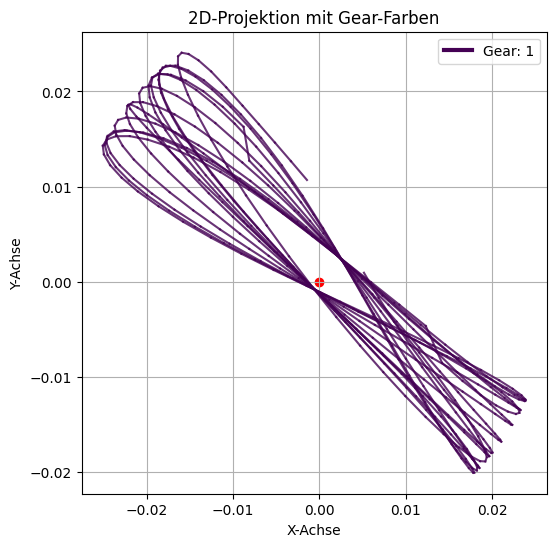

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nullpunkt setzen (die Werte sind relativ dazu)
x = df_modified_Stan_ab["a_x_rot"]
y = df_modified_Stan_ab["a_y_rot"]
technic = df_modified_Stan_ab["technic"]  # Gear-Kategorie

# Einzigartige Gears extrahieren & Farben zuweisen
unique_technic = technic.dropna().unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_technic)))  # Viridis Farbpalette

technic_mapping = {label: colors[i] for i, label in enumerate(unique_technic)}

plt.figure(figsize=(6, 6))

# Farbiges Plotten je nach Gear
for i in range(len(x) - 1):
    plt.plot(x[i:i+2], y[i:i+2], color=technic_mapping.get(technic.iloc[i], "black"), alpha=0.8)

# Nullpunkt markieren
plt.scatter(0, 0, color="red", marker="o", label="Nullpunkt")

# Legende manuell erstellen**: Marker für jede Gear-Farbe hinzufügen
legend_patches = [plt.Line2D([0], [0], color=color, lw=3, label=f"Gear: {gear}")
                  for gear, color in technic_mapping.items()]

plt.legend(handles=legend_patches, loc="upper right")

# Achsen & Titel
plt.xlabel("X-Achse")
plt.ylabel("Y-Achse")
plt.title("2D-Projektion mit Gear-Farben")
plt.grid(True)
plt.show()

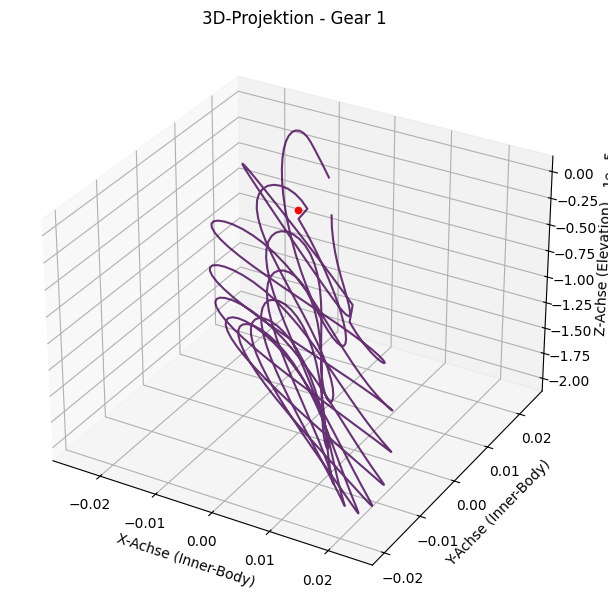

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Nullpunkt setzen (die Werte sind relativ dazu)
x = df_modified_Stan_ab["a_x_rot"]
y = df_modified_Stan_ab["a_y_rot"]
z = df_modified_Stan_ab["a_elevation_sp"]  # Z-Achse für 3D-Darstellung
technic = df_modified_Stan_ab["technic"]  # Gear-Kategorie

# Einzigartige Gears extrahieren & Farben zuweisen
unique_technic = technic.dropna().unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_technic)))  # Viridis Farbpalette
technic_mapping = {label: colors[i] for i, label in enumerate(unique_technic)}

# **Mehrere Plots erstellen - ein 3D-Plot pro Gear**
fig = plt.figure(figsize=(18, 12))  # Größere Figur für mehrere Plots

for idx, gear in enumerate(unique_technic):
    ax = fig.add_subplot(2, 3, idx + 1, projection="3d")  # 2x3 Grid für 6 Plots

    # Werte filtern für das aktuelle Gear
    mask = technic == gear
    x_filtered, y_filtered, z_filtered = x[mask], y[mask], z[mask]

    # Gear-spezifische Farbe
    color = technic_mapping.get(gear, "black")

    # 3D-Pfad plotten
    ax.plot(x_filtered, y_filtered, z_filtered, color=color, alpha=0.8)

    # Nullpunkt markieren
    ax.scatter(0, 0, 0, color="red", marker="o", label="Nullpunkt")

    # Achsen & Titel setzen
    ax.set_xlabel("X-Achse (Inner-Body)")
    ax.set_ylabel("Y-Achse (Inner-Body)")
    ax.set_zlabel("Z-Achse (Elevation)")
    ax.set_title(f"3D-Projektion - Gear {gear}")

# Finale Darstellung
plt.tight_layout()
plt.show()

## Zyklus funktion

In [ ]:
df_modified_Stan_ab

,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,time_delta,v,technic,latitude_smooth,longitude_smooth,phi_tangent,phi_tangent_deg,phi_tangent_rad,a_x_rot,a_y_rot
0,46.500484,8.302950,1350.003148,33.372797,20250325T092022716,XC,11783,09:20:22.7,2025-03-25,0.000000,...,0.0,0.0,1,46.500489,8.302957,1.914084,109.668917,1.914084,-0.001439,0.010699
1,46.500487,8.302951,1350.006296,33.086054,20250325T092022729,XC,11783,09:20:22.7,2025-03-25,0.115974,...,0.0,0.0,1,46.500491,8.302957,1.910235,109.448424,1.910235,-0.003288,0.012669
2,46.500491,8.302952,1350.009443,32.485610,20250325T092022741,XC,11783,09:20:22.7,2025-03-25,0.223142,...,0.0,0.0,1,46.500493,8.302956,1.906640,109.242446,1.906640,-0.005149,0.014626
3,46.500494,8.302954,1350.012590,31.589394,20250325T092022754,XC,11783,09:20:22.7,2025-03-25,0.319115,...,0.0,0.0,1,46.500495,8.302955,1.903297,109.050902,1.903297,-0.007020,0.016571
4,46.500498,8.302955,1350.015737,30.423880,20250325T092022767,XC,11783,09:20:22.7,2025-03-25,0.401764,...,0.0,0.0,1,46.500497,8.302955,1.900205,108.873706,1.900205,-0.008899,0.018506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,46.500494,8.301912,1350.012590,30.092357,20250325T092028936,XC,11783,09:20:28.9,2025-03-25,-79.594802,...,0.0,0.0,1,46.500494,8.301912,-1.448651,-83.001570,-1.448651,0.012428,-0.009014
495,46.500491,8.301911,1350.009443,31.333540,20250325T092028949,XC,11783,09:20:28.9,2025-03-25,-79.713859,...,0.0,0.0,1,46.500493,8.301912,-1.433126,-82.112079,-1.433126,0.010496,-0.006624
496,46.500487,8.301909,1350.006296,32.303964,20250325T092028962,XC,11783,09:20:28.9,2025-03-25,-79.837936,...,0.0,0.0,1,46.500491,8.301912,-1.417328,-81.206913,-1.417328,0.008640,-0.004179
497,46.500484,8.301907,1350.003148,32.977518,20250325T092028974,XC,11783,09:20:28.9,2025-03-25,-79.964227,...,0.0,0.0,1,46.500489,8.301913,-1.401249,-80.285628,-1.401249,0.006864,-0.001679


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # nötig für 3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

def detect_and_plot_cycles_by_technic(df, x_column, y_column, z_column=None, peak_column="a_y_norm_sp", distance=5, prominence=0.005, height=None):
    """
    Identifiziert Bewegungszyklen basierend auf lokalen Maxima in einer bestimmten Spalte und visualisiert sie.
    Jeder Zyklus innerhalb einer Technik erhält eine eigene Farbe.

    Parameter:
    - df: DataFrame mit Zyklusinformationen.
    - x_column: Name der X-Spalte für die Bewegung.
    - y_column: Name der Y-Spalte für die Bewegung.
    - z_column: (Optional) Name der Z-Spalte für die Bewegung.
    - peak_column: Spalte, in der Maxima erkannt werden.
    - distance: Mindestanzahl an Punkten zwischen zwei Maxima.
    - prominence: Mindesthöhe eines Peaks relativ zur Umgebung.
    - height: Mindestwert eines Peaks (optional).

    Rückgabe:
    - df mit einer neuen 'cycle_id'-Spalte.
    """

    if peak_column not in df.columns:
        raise ValueError(f"Spalte '{peak_column}' nicht im DataFrame gefunden.")

    #  Index zurücksetzen, um Probleme mit 'find_peaks()' zu vermeiden
    df = df.reset_index(drop=True)

    # 1 Zyklus-Detektion mit find_peaks()
    peaks, _ = find_peaks(df[peak_column], distance=distance, prominence=prominence, height=height)

    # Zyklusnummern zuweisen (mithilfe von iloc, um Fehler zu vermeiden)
    df['cycle_id'] = np.zeros(len(df), dtype=int)
    df.iloc[peaks, df.columns.get_loc('cycle_id')] = 1
    df['cycle_id'] = df['cycle_id'].cumsum()



    unique_technics = df["technic"].dropna().unique()
    unique_cycles = df["cycle_id"].unique()

    print(f"Anzahl der Zyklen: {len(unique_cycles)}")



    for technic in unique_technics:
      df_technic = df[df["technic"] == technic]

      # Farbliste generieren (jedem Zyklus eine eigene Farbe zuweisen)
      unique_cycles = df_technic["cycle_id"].unique()
      colors = plt.cm.jet(np.linspace(0, 1, len(unique_cycles)))

      # 3D oder 2D je nach z_column
      fig = plt.figure(figsize=(8, 6))
      if z_column and z_column in df.columns:
          ax = fig.add_subplot(111, projection='3d')
      else:
          ax = fig.add_subplot(111)

      for i, cycle_id in enumerate(unique_cycles):
          cycle_data = df_technic[df_technic["cycle_id"] == cycle_id]

          # Auf Nullpunkt normieren
          x_shifted = cycle_data[x_column] - cycle_data[x_column].iloc[0]
          y_shifted = cycle_data[y_column] - cycle_data[y_column].iloc[0]

          if z_column and z_column in df.columns:
              z_shifted = cycle_data[z_column] - cycle_data[z_column].iloc[0]
              ax.plot3D(x_shifted, y_shifted, z_shifted, color=colors[i], alpha=0.7, label=f"Zyklus {cycle_id}" if i < 10 else None)
          else:
              ax.plot(x_shifted, y_shifted, color=colors[i], alpha=0.7, label=f"Zyklus {cycle_id}" if i < 10 else None)

      ax.set_title(f"Überlagerte Bewegungszyklen (3D) für Technik: {technic}")
      ax.set_xlabel(f"{x_column} (relativ)")
      ax.set_ylabel(f"{y_column} (relativ)")
      if z_column and z_column in df.columns:
          ax.set_zlabel(f"{z_column} (relativ)")

      # Legende nur wenn wenige Zyklen
      if len(unique_cycles) <= 10:
          ax.legend()

      plt.tight_layout()
      plt.show()





  # 3️⃣ Zeitreihenplot mit Zyklusgrenzen und Technik-Hintergrund
    if "date_time" not in df.columns:
        print("⚠️  'date_time'-Spalte nicht gefunden. Zeitreihenplot wird übersprungen.")
        return df

    fig, ax = plt.subplots(figsize=(14, 6))

    # Zeitachsen-Daten
    time = pd.to_datetime(df["date_time"])

    # Plotte x, y, z
    ax.plot(time, df[x_column], label=x_column, color='tab:blue')
    ax.plot(time, df[y_column], label=y_column, color='tab:green')
    if z_column and z_column in df.columns:
        ax.plot(time, df[z_column], label=z_column, color='tab:red')

    # Vertikale Linien bei Zyklusbeginn
    cycle_changes = df[df["cycle_id"].diff() == 1]
    for xc in pd.to_datetime(cycle_changes["date_time"]):
        ax.axvline(x=xc, color='black', linestyle='--', linewidth=0.5)

    # Technik-Farbflächen im Hintergrund
    technic_colors = plt.cm.Pastel1(np.linspace(0, 1, df["technic"].nunique()))
    current_color_index = 0
    last_index = 0
    for i in range(1, len(df)):
        if df["technic"].iloc[i] != df["technic"].iloc[i - 1]:
            ax.axvspan(time.iloc[last_index], time.iloc[i], color=technic_colors[current_color_index], alpha=0.3,
                       label=f"Technic: {df['technic'].iloc[i-1]}" if current_color_index == 0 else None)
            current_color_index = (current_color_index + 1) % len(technic_colors)
            last_index = i
    # Letzter Abschnitt
    ax.axvspan(time.iloc[last_index], time.iloc[-1], color=technic_colors[current_color_index], alpha=0.3)

    ax.set_xlabel("Zeit")
    ax.set_ylabel("Sensorwerte")
    ax.set_title(f"Zeitverlauf mit Zyklusgrenze {peak_column} & Technik-Farben")
    ax.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show()


        # 4️⃣ Zyklusdauer-Balkendiagramm
    # Zyklusdauer berechnen
    df["date_time"] = pd.to_datetime(df["date_time"])
    cycle_groups = df.groupby("cycle_id")

    durations = cycle_groups["date_time"].agg(lambda x: (x.max() - x.min()).total_seconds())
    technics = cycle_groups["technic"].first()

    cycle_stats = pd.DataFrame({
        "duration_sec": durations,
        "technic": technics
    }).reset_index()

    # NaN-Techniken behandeln
    cycle_stats["technic"] = cycle_stats["technic"].fillna("Unbekannt")

    # Farben je Technik
    unique_technics = cycle_stats["technic"].unique()
    color_map = {tech: color for tech, color in zip(unique_technics, plt.cm.tab10.colors)}
    bar_colors = cycle_stats["technic"].map(color_map)

    # Balkendiagramm
    plt.figure(figsize=(12, 5))
    plt.bar(cycle_stats["cycle_id"], cycle_stats["duration_sec"], color=bar_colors)

    # Legende erzeugen
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[tech]) for tech in unique_technics]
    plt.legend(handles, unique_technics, title="Technik")

    plt.xlabel("Zyklus-ID")
    plt.ylabel("Dauer (Sekunden)")
    plt.title("Zyklusdauer nach Technik")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()






    return df

Anzahl der Zyklen: 13


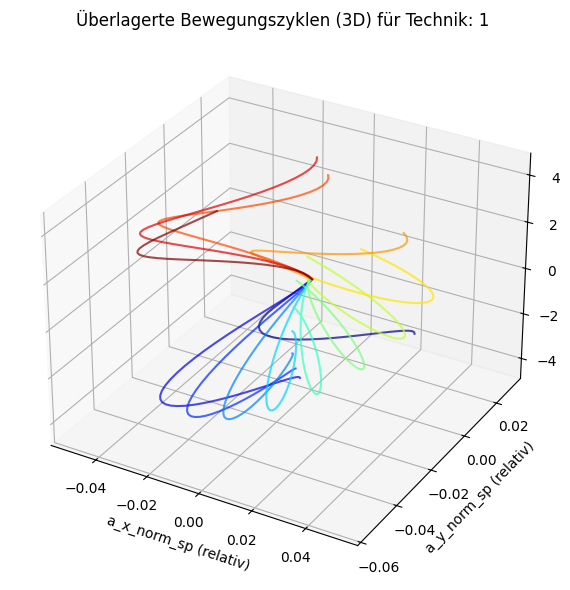

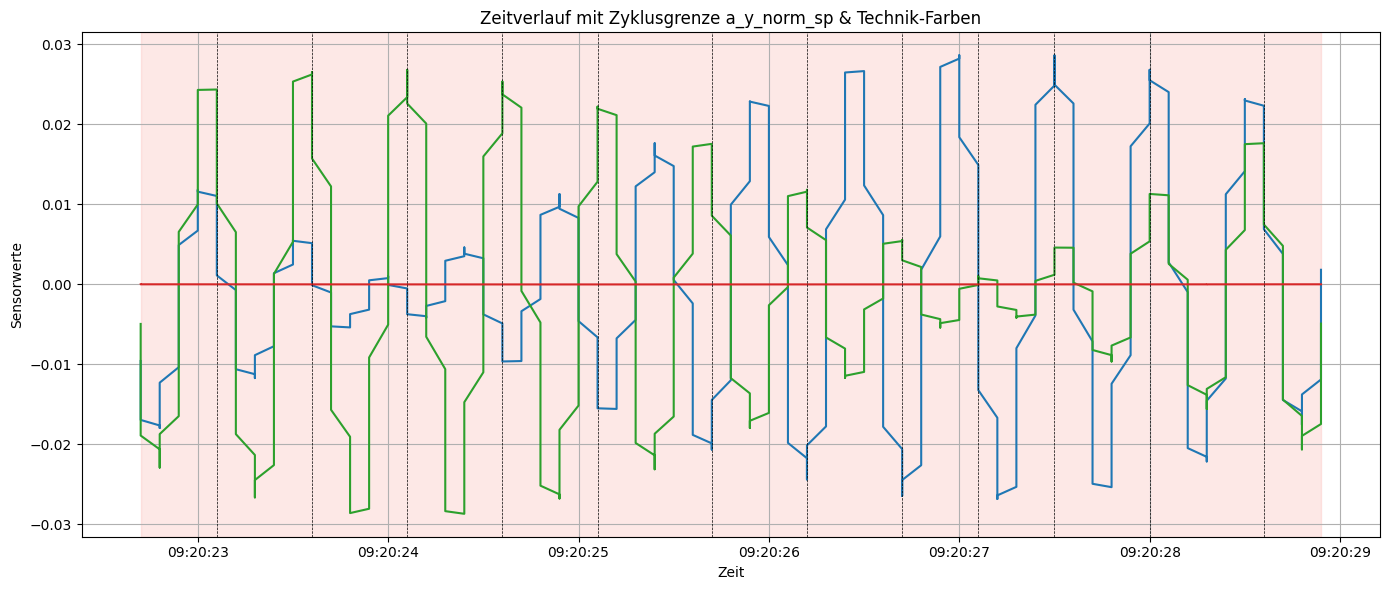

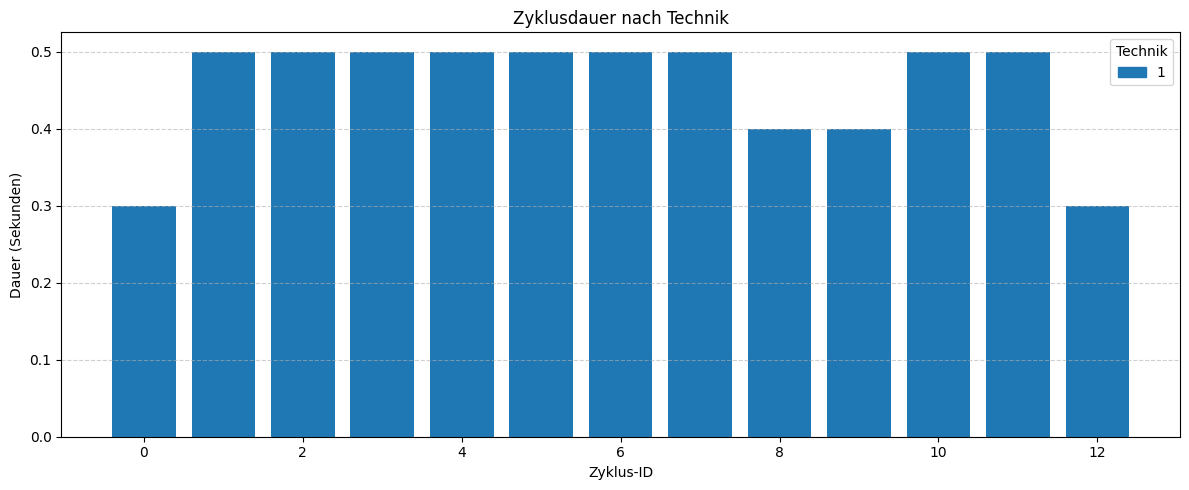

In [ ]:
# 🚀 **Funktion ausführen mit den gewünschten Spalten & Zyklusparametern**
df_modified_Stan_ab = detect_and_plot_cycles_by_technic(
    df_modified_Stan_ab,
    x_column="a_x_norm_sp",
    y_column="a_y_norm_sp",
    z_column="a_elevation_sp",
    peak_column="a_y_norm_sp",  # Spalte, in der Maxima gesucht werden
    distance=5,
    prominence=0.005
)

In [ ]:
orginal = df_modified.copy()
orginal.columns

Index(['latitude', 'longitude', 'elevation', 'speed_measured', 'timestamp',
       'discipline_from_name', 'tf_id', 'time', 'date', 'x_norm', 'y_norm',
       'x_rel', 'y_rel', 'x_norm_sp', 'v_x_norm_sp', 'a_x_norm_sp',
       'y_norm_sp', 'v_y_norm_sp', 'a_y_norm_sp', 'elevation_sp',
       'v_elevation_sp', 'a_elevation_sp', 'k', 'k_xy', 'shifted_x_norm',
       'shifted_y_norm', 'shifted_latitude', 'shifted_longitude', 'distance',
       'distance_x_y', 'date_time', 'shifted_date_time', 'time_delta', 'v',
       'technic'],
      dtype='object')

Anzahl der Zyklen: 1


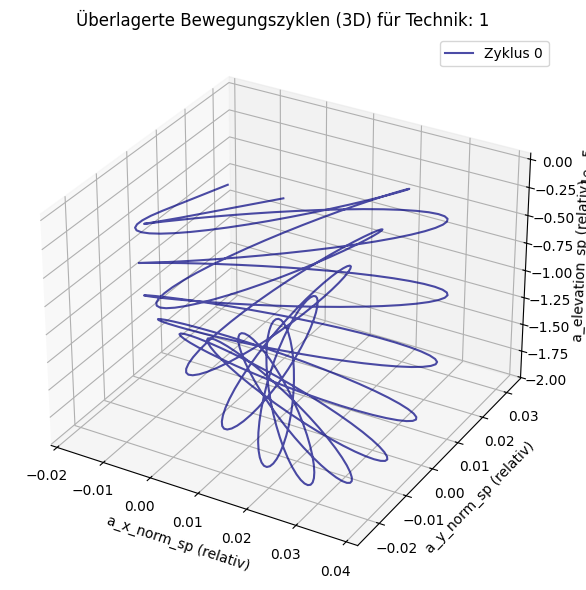

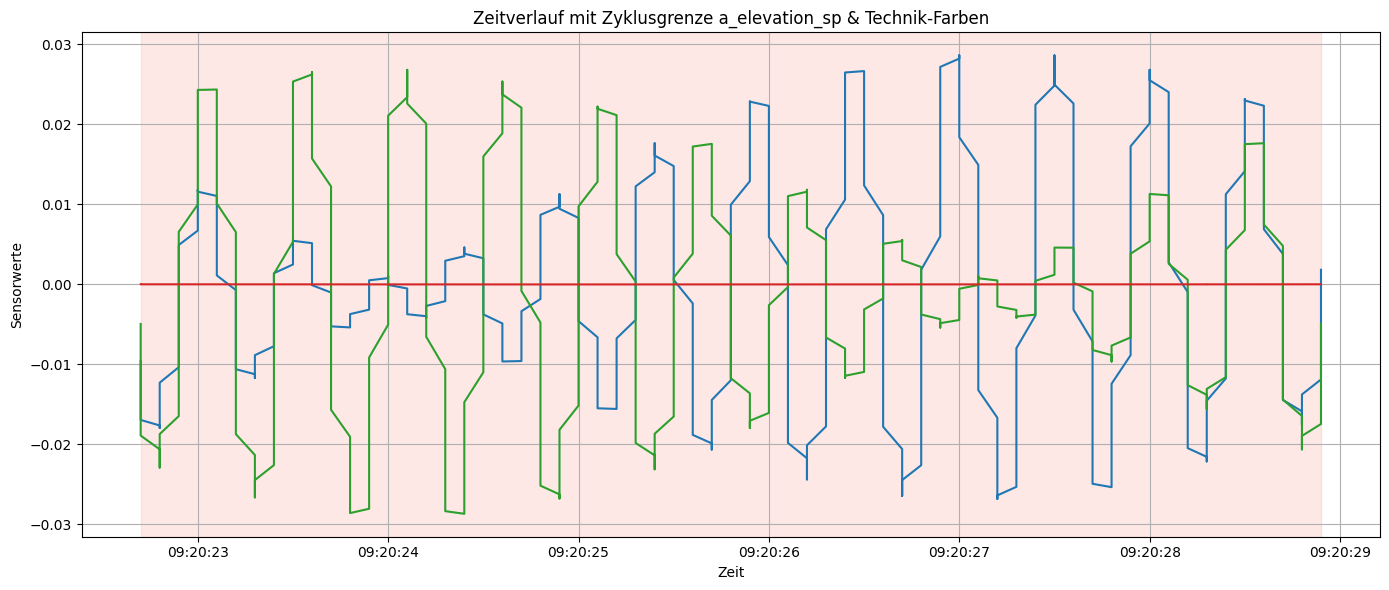

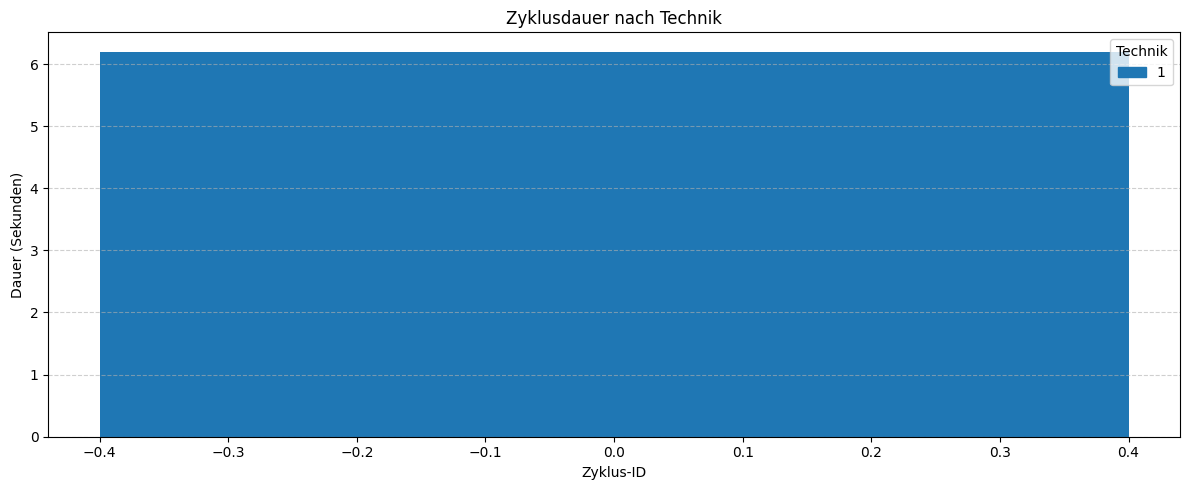

In [ ]:
# 🚀 **Funktion ausführen mit den gewünschten Spalten & Zyklusparametern**
orginal = detect_and_plot_cycles_by_technic(
    orginal,
    x_column="a_x_norm_sp",
    y_column="a_y_norm_sp",
    z_column="a_elevation_sp",  # None möglich
    peak_column="a_elevation_sp",  # Spalte, in der Maxima gesucht werden
    distance=5, # Mindestabstand zwischen Zyklen
    prominence=0.005   # Wie stark muss sich ein lokales maxima von seiner Umgebung abheben
)

In [ ]:
orginal

,latitude,longitude,elevation,speed_measured,timestamp,discipline_from_name,tf_id,time,date,x_norm,...,shifted_latitude,shifted_longitude,distance,distance_x_y,date_time,shifted_date_time,time_delta,v,technic,cycle_id
0,46.500480,8.302427,1351.381,10.3,20240127T120231400000,XC,11783,12:02:31.4,2024-01-27,0.000000,...,NaN,NaN,0.000000,0.000000,2024-01-27 12:02:31.400,2024-01-27 12:02:31.400,0.0,0.000000,NaN,0
1,46.500479,8.302423,1351.472,13.3,20240127T120231500000,XC,11783,12:02:31.5,2024-01-27,-0.369094,...,46.500480,8.302427,0.379037,0.378899,2024-01-27 12:02:31.500,2024-01-27 12:02:31.400,0.1,3.788987,NaN,0
2,46.500477,8.302418,1351.411,13.7,20240127T120231600000,XC,11783,12:02:31.6,2024-01-27,-0.708476,...,46.500479,8.302423,0.392572,0.392429,2024-01-27 12:02:31.600,2024-01-27 12:02:31.500,0.1,3.924287,NaN,0
3,46.500475,8.302414,1351.401,13.7,20240127T120231700000,XC,11783,12:02:31.7,2024-01-27,-1.017755,...,46.500477,8.302418,0.406760,0.406611,2024-01-27 12:02:31.700,2024-01-27 12:02:31.600,0.1,4.066112,NaN,0
4,46.500472,8.302410,1351.482,14.6,20240127T120231800000,XC,11783,12:02:31.8,2024-01-27,-1.335394,...,46.500475,8.302414,0.466690,0.466520,2024-01-27 12:02:31.800,2024-01-27 12:02:31.700,0.1,4.665201,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,46.500567,8.302191,1353.517,27.0,20240127T120537800000,XC,11783,12:05:37.8,2024-01-27,-18.030371,...,46.500574,8.302209,1.513311,1.512759,2024-01-27 12:05:37.800,2024-01-27 12:05:37.600,0.2,7.563793,NaN,204
1860,46.500564,8.302183,1353.531,27.0,20240127T120537900000,XC,11783,12:05:37.9,2024-01-27,-18.700775,...,46.500567,8.302191,0.741562,0.741292,2024-01-27 12:05:37.900,2024-01-27 12:05:37.800,0.1,7.412916,NaN,204
1861,46.500561,8.302174,1353.541,26.7,20240127T120538000000,XC,11783,12:05:38.0,2024-01-27,-19.363507,...,46.500564,8.302183,0.734657,0.734389,2024-01-27 12:05:38.000,2024-01-27 12:05:37.900,0.1,7.343888,NaN,204
1862,46.500559,8.302166,1353.513,25.9,20240127T120538100000,XC,11783,12:05:38.1,2024-01-27,-20.002827,...,46.500561,8.302174,0.695094,0.694840,2024-01-27 12:05:38.100,2024-01-27 12:05:38.000,0.1,6.948404,NaN,204
